<a href="https://colab.research.google.com/gist/YiHui-Liu/1ed2f9484c5e20587d016e5d7854c273/wechatmsganalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QQËÅäÂ§©ËÆ∞ÂΩïÂàÜÊûê WeChatMsgAnalysis
‰æùÁÖß [WeChatMsg](https://github.com/LC044/WeChatMsg) ÁöÑÊïôÁ®ãÂØºÂá∫ `csv` Êñá‰ª∂ÔºåÂè™ÈúÄË¶ÅÂØºÂá∫ÊñáÊú¨Âç≥ÂèØ„ÄÇ

ÁÇπÂáªÂ∑¶‰æßÁöÑÊñá‰ª∂Ôºå‰∏ä‰º† `csv` Êñá‰ª∂Âπ∂‰∏îÈáçÂëΩÂêç‰∏∫ `msg.csv`„ÄÇ

‰∏éÂéüÂßãÁöÑÂæÆ‰ø°ËÅäÂ§©ËÆ∞ÂΩïÂàÜÊûêÁ±ª‰ººÔºå‰∏çËøáÂØºÂá∫‰πãÂêéÈúÄË¶ÅÊ≥®ÊÑèÁöÑÊòØÂ∞ÜÔºåÊâÄÊúâÂèëÈÄÅËÄÖÁöÑÂêçÂ≠óÁªü‰∏ÄÊõøÊç¢‰∏∫ÊüêÊüêÔºàqqÂè∑ÔºâÁöÑÊ†ºÂºèÔºåËøôÊ†∑Êñπ‰æøÂ§ÑÁêÜÔºåÂêåÊó∂Âõ†‰∏∫qqÁöÑËÅäÂ§©ËÆ∞ÂΩïÊòØÊØèÊ¨°Êõ¥ÊîπÂêçÁß∞‰πãÂêéÈÉΩ‰ºöÊúâ‰∏çÂêåÁöÑÂêçÂ≠óÔºåÊâÄ‰ª•ÈúÄË¶ÅÊõøÊç¢Â§öÊ¨°Êù•Áªü‰∏ÄÂëΩÂêçÔºåÁÑ∂ÂêéÊàë‰ª¨ÈúÄË¶ÅËÅäÂ§©ËÆ∞ÂΩïÁöÑÂ§¥ÈÉ®Âà†Èô§ÔºåÂè™‰øùÁïô‰∏ÄËà¨Ê†ºÂºèÁöÑËÅäÂ§©ËÆ∞ÂΩï


In [1]:
!pip install numpy seaborn pandas wordcloud tqdm paddlepaddle paddlenlp

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
     ----- ------------------------------- 41.0/294.9 kB 991.0 kB/s eta 0:00:01
     --------------- ---------------------- 122.9/294.9 kB 1.4 MB/s eta 0:00:01
     ------------------------------ ------- 235.5/294.9 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
      --------------------------------------- 0.3/11.6 MB 5.7 MB/s eta 0:00:02
     - -------------------------------------- 0.6/11.6 MB 5.9 MB/s eta 0:00:02
     -- ------------------------------------- 0.8/11.6 MB 6.7 MB/s eta 0:00:02
     --- ------------------------------------ 1.0/11.6 MB 5.7 MB/s eta 0:00:02
     ---- ----------------------------------- 1.2/11.6 MB 5.4 MB/s eta 0:00:02
     ---- ----------------------------------- 1.4/11.6 MB 5.3 MB/s eta 0:00:02



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## ÂáÜÂ§áÈò∂ÊÆµ
### ÂºïÂÖ•ÂåÖ
* pandas: Âü∫Á°ÄÊï∞ÊçÆÊ°ÜÊû∂
* matplotlib & seaborn: ‰∏ªË¶ÅÁªòÂõæÊ°ÜÊû∂
* jieba: ‰∏≠ÊñáÂàÜËØç
* wordcloud: ËØç‰∫ë
* paddlenlp: ÊÉÖÊÑüÂàÜÊûê

In [1]:
import re
import time
import numpy as np
import pandas as pd
import jieba
import jieba.posseg as pseg
from PIL import Image
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.ticker as mticker
import matplotlib.transforms as mtransforms
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
from tqdm import tqdm
from paddlenlp import Taskflow

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


### ÁªòÂõæËÆæÁΩÆ

In [2]:
sns.set_theme(style="ticks")
font = "simsun.ttc"
fp = fm.FontProperties(fname=font)
plt.rcParams["axes.unicode_minus"] = False

### ‰ª£Á†ÅÂ§ÑÁêÜqqÊñá‰ª∂

In [3]:
import re
import csv
def process_chat_records(input_file, output_csv):
    # ËØªÂèñËÅäÂ§©ËÆ∞ÂΩï
    with open(input_file, 'r', encoding='utf-8') as file:
        chat_lines = file.readlines()

    # ÂàùÂßãÂåñCSVÊï∞ÊçÆ
    csv_data = []

    # Ê≠£ÂàôË°®ËææÂºèÂåπÈÖçËÅäÂ§©ËÆ∞ÂΩï‰∏≠ÁöÑÊó•Êúü„ÄÅÊó∂Èó¥„ÄÅÂèëÈÄÅËÄÖÂíåÂÜÖÂÆπ
    pattern = re.compile(r'(\d{4}-\d{2}-\d{2} \d{1,2}:\d{2}:\d{2}) (.+?)\((\d+)\)')

    # Â§ÑÁêÜÊØè‰∏ÄË°åËÅäÂ§©ËÆ∞ÂΩï
    current_sender = None
    current_content = ""  # Ê∑ªÂä†Ëøô‰∏ÄË°å
    for line in chat_lines:
        match = pattern.match(line)
        if match:
            # Â¶ÇÊûúÂΩìÂâçÂ≠òÂú®ÂèëÈÄÅËÄÖÔºåÂ∞Ü‰πãÂâçÁºìÂ≠òÁöÑÂÜÖÂÆπÊ∑ªÂä†Âà∞CSVÊï∞ÊçÆ‰∏≠
            if current_sender:
                if not current_content.strip():
                    current_content = "Ôºà‰ø°ÊÅØÂõûÂ§çÊàñËÄÖÂàÜ‰∫´Ôºâ"
                csv_data.append([current_sender, match.group(1), current_content.strip()])
            
            # Êõ¥Êñ∞ÂΩìÂâçÂèëÈÄÅËÄÖ
            current_sender = match.group(2) + '(' + match.group(3) + ')'
            
            # ÈáçÁΩÆÂΩìÂâçÂÜÖÂÆπ
            current_content = ""
        else:
            # Ê≤°ÊúâÂåπÈÖçÂà∞Êó•ÊúüÊó∂Èó¥‰ø°ÊÅØÔºåÂ∞ÜÊï¥Ë°å‰Ωú‰∏∫ÂÜÖÂÆπÊ∑ªÂä†Âà∞ÂΩìÂâçÂÜÖÂÆπ‰∏≠
            current_content += line

    # Â∞ÜCSVÊï∞ÊçÆÂÜôÂÖ•Êñá‰ª∂
    with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
        csv_writer = csv.writer(csvfile)
        # ÂÜôÂÖ•Ë°®Â§¥
        csv_writer.writerow(['Member', 'StrTime', 'StrContent'])
        # ÂÜôÂÖ•Êï∞ÊçÆ
        csv_writer.writerows(csv_data)

In [4]:
#resolving_by_user("2.txt", "output_resolved_data.csv")
process_chat_records("2.txt", "output_chat_log.csv")


### ‰∫∫ÂêçÊ†áÁ≠æ

In [5]:
labels = ["ZMX", "LJM"]

### Êï∞ÊçÆËØªÂèñ
* `filePath`: Ê∂àÊÅØËÆ∞ÂΩïÊñá‰ª∂ÁöÑË∑ØÂæÑ
* `dStart`: ÂºÄÂßãÁöÑÊó∂Èó¥
* `dEnd`: ÁªìÊùüÁöÑÊó∂Èó¥
* `tZone`: Êó∂Âå∫Ôºå‰æãÂ¶ÇÂåó‰∫¨Êó∂Èó¥‰∏∫ `+8`

‰∏çËÄÉËôëËøô‰πàÈ∫ªÁÉ¶qqÂØºÂá∫ÁöÑÊ≤°ÊúâÊó∂Âå∫‰ø°ÊÅØ

In [6]:
filePath = "output_chat_log.csv"
dStart = "2023-01-01 23:43:41"
dEnd = "2024-02-04 20:50:12"

In [61]:
df = pd.read_csv(filePath, encoding="utf-8")



# Convert the 'StrTime' column to datetime
df["StrTime"] = pd.to_datetime(df["StrTime"])

# Extract time information
df["year"] = df["StrTime"].dt.year
df["month"] = df["StrTime"].dt.month
df["day"] = df["StrTime"].dt.day
df["hour"] = df["StrTime"].dt.hour
df["minute"] = df["StrTime"].dt.minute
df["second"] = df["StrTime"].dt.second
                       
conditions = [
    df["StrContent"].str.contains("Ôºà‰ø°ÊÅØÂõûÂ§çÊàñËÄÖÂàÜ‰∫´Ôºâ"),
    df["StrContent"].str.contains("\[ÂõæÁâá\]"),
    df["StrContent"].str.contains("\[Ë°®ÊÉÖ\]")
]

# ÂàõÂª∫ÂØπÂ∫îÁöÑÂÄºÂàóË°®
values = [9, 3, 47]

# ‰ΩøÁî® numpy ÁöÑ select ÂáΩÊï∞Ê†πÊçÆÊù°‰ª∂ËÆæÁΩÆÊñ∞Âàó "Type"
df["Type"] = np.select(conditions, values, default=1)
# Ê∑ªÂä†Âêç‰∏∫ "Count" ÁöÑÊñ∞ÂàóÔºåÊØè‰∏ÄË°åÈÉΩËÆæÁΩÆ‰∏∫1
df["Count"] = 1
member_values = ['Âº†Á±≥Èõ™(2634137077)', 'ÂªñÂÆ∂Èì≠(3084703753)']
df['IsSender'] = np.where(df['Member'] == 'Âº†Á±≥Èõ™(2634137077)', 0,
                          np.where(df['Member'] == 'ÂªñÂÆ∂Èì≠(3084703753)', 1, np.nan))

dfs = [df.query("Member == @value") for value in member_values]


### Ê∂àÊÅØËøáÊª§

In [10]:
def textFilter(text: str):
    text = text.lower()
    # try:
    #     co = re.compile("[\U00010000-\U0010ffff]")
    # except re.error:
    #     co = re.compile("[\uD800-\uDBFF][\uDC00-\uDFFF]")
    # text = co.sub(" ", text)
    co = re.compile("\[[\u4e00-\u9fa5]+\]")
    return co.sub(" ", text)

### Ëé∑ÂèñÊñáÊú¨Ê∂àÊÅØ

In [11]:
texts = [
    [textFilter(i) for i in dfs[0].query("Type == 1")["StrContent"].to_list()],
    [textFilter(i) for i in dfs[1].query("Type == 1")["StrContent"].to_list()],
]

## Ê∂àÊÅØÈ¢ëÁéáÂàÜÊûê
### Á±ªÂûãÂàÜÊûê
Ê†πÊçÆÊ∂àÊÅØÁöÑÁ±ªÂûãËøõË°åÂàÜÁ±ªÔºåÂèØ‰ª•ÁúãÂá∫ÂñúÊ¨¢ÂèëÈÄÅÁöÑÊ∂àÊÅØÁ±ªÂûãÔºåÂêåÊó∂‰πüÂèØ‰ª•ÁúãÂá∫Ë∞ÅÂèëÁöÑÂ§ö
* 1 = Text
* 3 = Image
* 34 = Voice
* 43 = Video
* 47 = Sticker
* 48 = Location
* 10000 = System

qqÈáåÈù¢Êó†Ê≥ïÂØºÂá∫* 34 = Voice* 43 = Video‰ø°ÊÅØÊâÄ‰ª•‰∏çÂ±ïÁ§∫

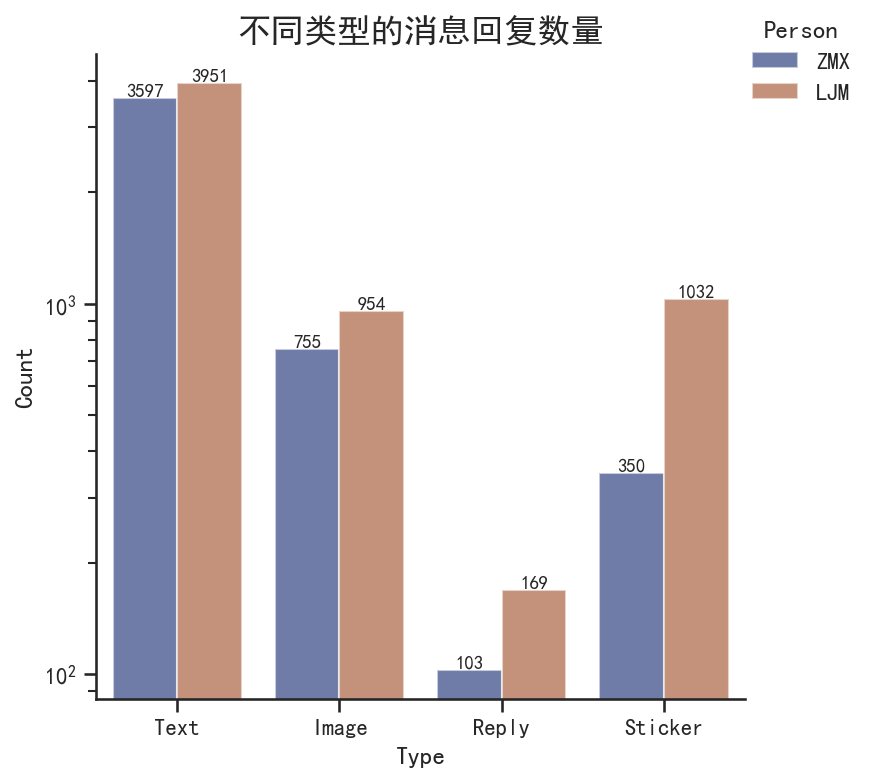

In [12]:
data = {}
for i in range(2):
    data[labels[i]] = [
        len(dfs[i].query("Type == 1")),
        len(dfs[i].query("Type == 3")),
        len(dfs[i].query("Type == 9")),
        # len(dfs[i].query("Type == 43")),
        len(dfs[i].query("Type == 47")),
    ]

data = (
    # pd.DataFrame(data, index=["Text", "Image", "Voice", "Video", "Sticker"])
    pd.DataFrame(data, index=["Text", "Image","Reply", "Sticker"])
    .reset_index()
    .melt("index")
    .rename(columns={"index": "Type", "variable": "Person", "value": "Count"})
)
g = sns.catplot(data, kind="bar", x="Type", y="Count", hue="Person", palette="dark", alpha=0.6, height=6)

for ax in g.axes.ravel():
    for i in range(2):
        ax.bar_label(ax.containers[i], fontsize=9)

# # Âú®ÂõæÁâá‰∏äÂ¢ûÂä†ÊñáÂ≠óÊâπÊ≥®
# for ax in g.axes.ravel():
#     # ËÆæÁΩÆÊâπÊ≥®ÁöÑÂùêÊ†áÂíåÊñáÊú¨
#     ax.text(3, 1e4, "VideoÂ±ûÊÄßÊó†Ê≥ïÊòæÁ§∫", ha='center', va='center', fontsize=9, color='red')

sns.move_legend(g, "upper right")
plt.rcParams['font.sans-serif'] = ['SimHei']  # ÊåáÂÆö‰∏≠ÊñáÂ≠ó‰Ωì
plt.title('‰∏çÂêåÁ±ªÂûãÁöÑÊ∂àÊÅØÂõûÂ§çÊï∞Èáè', fontsize=16)

plt.yscale("log")

g.figure.set_size_inches(6, 5)
g.figure.set_dpi(150)
plt.show()
plt.close()

### Ê∂àÊÅØÈïøÂ∫¶ÂàÜÊûê
* `sN`: ËÆæÁΩÆÊòæÁ§∫ËåÉÂõ¥Ôºö
$$
\mu + \mathrm{sN} * \sigma
$$
* `multiple`: Áõ¥ÊñπÂõæÂ†ÜÂè†Ê†ºÂºè

In [13]:
sN = 3
multiple = "dodge"

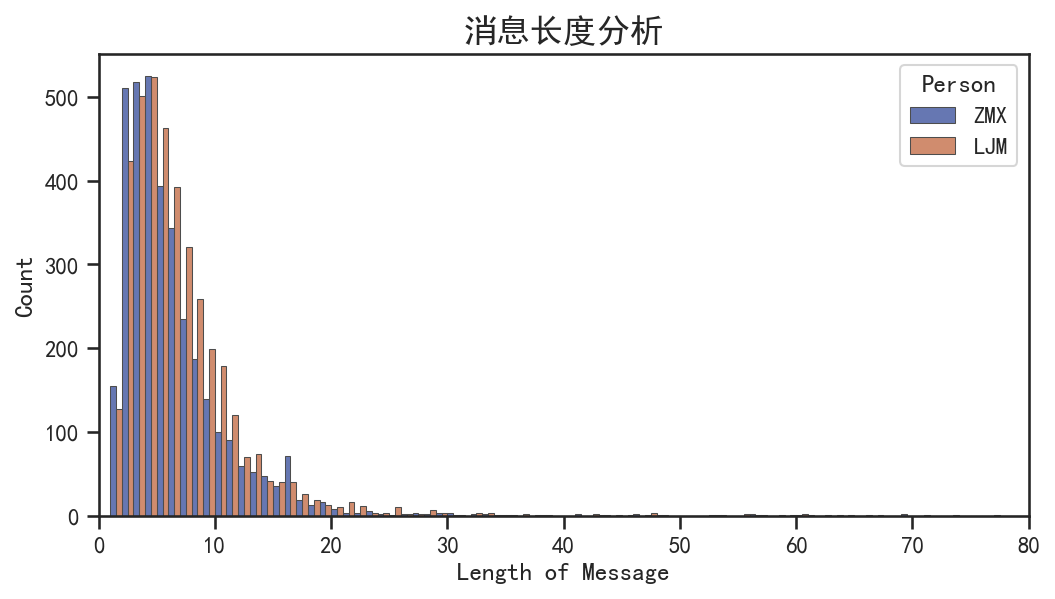

In [14]:
mu, std = 0, 0
data = {"Length": [], "Person": []}
for i in range(2):
    length = [len(textFilter(i)) for i in texts[i]]
    data["Length"] += length
    data["Person"] += [labels[i]] * len(length)
    if np.mean(length) + sN * np.std(length) > mu + std:
        mu, std = np.mean(length), np.std(length)
xlim = int(np.ceil(mu + sN * std))

data = pd.DataFrame(data)
bins = np.linspace(0, xlim, xlim + 1)

ax = sns.histplot(
    data=data,
    x="Length",
    hue="Person",
    bins=bins,
    multiple=multiple,
    edgecolor=".3",
    linewidth=0.5,
    palette="dark",
    alpha=0.6,
)
# ax.set_xlim(0, xlim)
# ÊàëÁöÑ‰ø°ÊÅØ‰∏äÈôêÂ§™Èïø‰∫ÜÔºåÂ±ïÁ§∫Âá∫Êù•‰∏çÂ•ΩÁúãÔºåÊâÄ‰ª•ËÆæÁΩÆ‰∫Ü‰∏Ä‰∏™ÂÄº
ax.set_xlim(0, 80)
ax.set_xlabel("Length of Message")

ax.figure.set_size_inches(8, 4)
ax.figure.set_dpi(150)
plt.rcParams['font.sans-serif'] = ['SimHei']  # ÊåáÂÆö‰∏≠ÊñáÂ≠ó‰Ωì
plt.title('Ê∂àÊÅØÈïøÂ∫¶ÂàÜÊûê', fontsize=16)
plt.show()
plt.close()

### ÊØèÊó•Ê¥ªË∑ÉÂàÜÊûê
ÂàíÂàÜÊØèÊó•24Â∞èÊó∂ÂÜÖÊØèÂ∞èÊó∂ÂèëÈÄÅÁöÑÊ∂àÊÅØÊï∞ÔºåÂèØ‰ª•ÂæóÁü•ÊØèÂ§©ÁöÑÊ¥ªË∑ÉÁöÑÊó∂Èó¥ÊÆµ

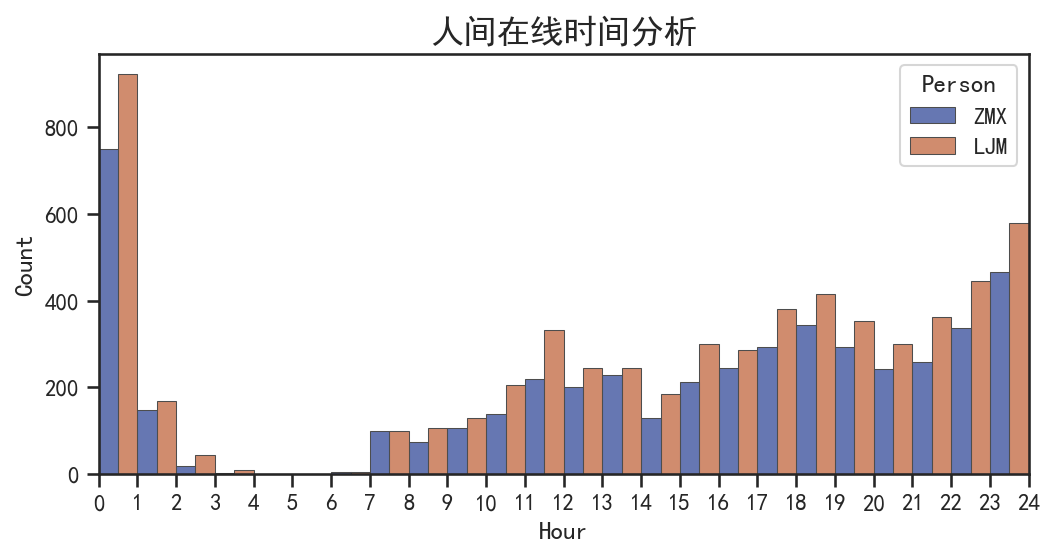

In [15]:
data = {"Time": [], "Person": []}
for i in range(2):
    hour = dfs[i]["hour"].to_list()
    data["Time"] += hour
    data["Person"] += [labels[i]] * len(hour)

data = pd.DataFrame(data)
bins = np.arange(0, 25, 1)

ax = sns.histplot(
    data=data,
    x="Time",
    hue="Person",
    bins=bins,
    multiple=multiple,
    edgecolor=".3",
    linewidth=0.5,
    palette="dark",
    alpha=0.6,
)
ax.set_xticks(bins)
ax.set_xticklabels(bins)
ax.set_xlabel("Hour")
ax.set_xlim(0, 24)
# sns.move_legend(ax, loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=2)
plt.rcParams['font.sans-serif'] = ['SimHei']  # ÊåáÂÆö‰∏≠ÊñáÂ≠ó‰Ωì
plt.title('‰∫∫Èó¥Âú®Á∫øÊó∂Èó¥ÂàÜÊûê', fontsize=16)
plt.subplots_adjust(top=0.9, bottom=0.2)

# for ax in g.axes.ravel():
#     # ËÆæÁΩÆÊâπÊ≥®ÁöÑÂùêÊ†áÂíåÊñáÊú¨
#     ax.text(3, 1e4, "‰∫∫Èó¥Âú®Á∫øÊó∂Èó¥ÂàÜÊûê", ha='center', va='center', fontsize=16, color='red')
ax.figure.set_size_inches(8, 4)
ax.figure.set_dpi(150)
plt.show()
plt.close()

### ÊØèÂë®Ê¥ªË∑ÉÂàÜÊûê
Êü•Áúã‰∏ÄÂë®ÂÜÖ‰ªéÂë®‰∏ÄÂà∞Âë®Êó•ÊØèÂ§©ÂèëÈÄÅÁöÑÊ∂àÊÅØÊï∞

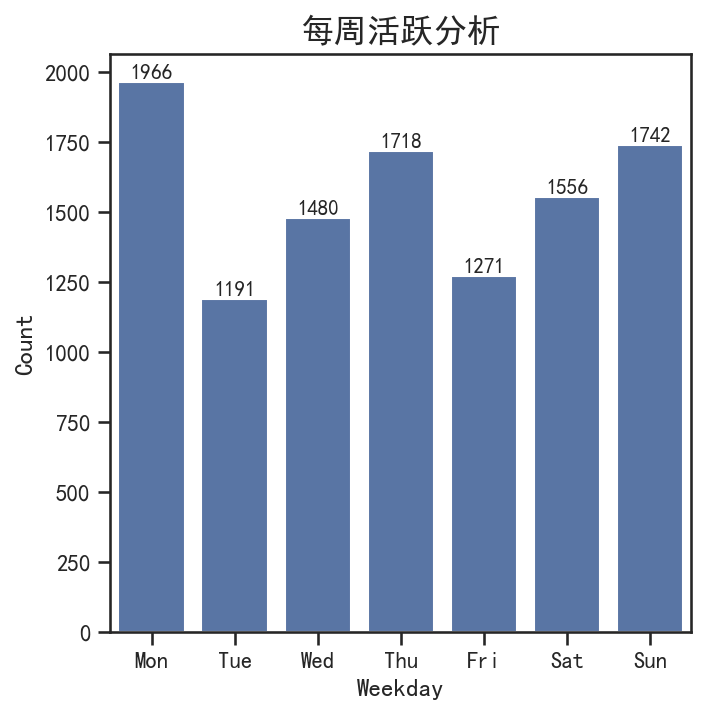

In [16]:


# grouper = pd.Grouper(key="day")
# data = df.groupby(grouper)["Count"].sum()
# data = data.sort_index()
# data.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# ‰ΩøÁî® "year", "month", "day" ÂàóÂàõÂª∫‰∏Ä‰∏™ datetime Âàó
df["Date"] = pd.to_datetime(df[["year", "month", "day"]])

# Â∞Ü datetime ÂàóËΩ¨Êç¢‰∏∫ÊòüÊúüÂá†ÔºåÂπ∂Ê∑ªÂä†‰∏ÄÂàó "Weekday"
df["Weekday"] = df["Date"].dt.day_name()
grouper = pd.Grouper(key="Weekday")
data = df.groupby(grouper)["Count"].sum()
data.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
# ÂàõÂª∫‰∏Ä‰∏™ÂåÖÂê´ÊâÄÊúâÊòüÊúü‰ø°ÊÅØÁöÑÈ°∫Â∫èÂàóË°®
# weekday_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# # Ê†πÊçÆÊòüÊúüÂá†ËøõË°åÂàÜÁªÑÔºåÁªüËÆ°Á¥ØÂä†
# result = df.groupby("Weekday")["Count"].sum().reindex(weekday_order)

ax = sns.barplot(data=data, errorbar=None)
ax.set_xlabel("Weekday")
ax.bar_label(ax.containers[0], fontsize=10)

ax.figure.set_size_inches(5, 5)
ax.figure.set_dpi(150)
plt.rcParams['font.sans-serif'] = ['SimHei']  # ÊåáÂÆö‰∏≠ÊñáÂ≠ó‰Ωì
plt.title('ÊØèÂë®Ê¥ªË∑ÉÂàÜÊûê', fontsize=16)
plt.show()
plt.close()

### ÊåâÂë®ÂàíÂàÜÂπ¥Â∫¶Ê¥ªË∑ÉÂàÜÊûê
ÂàíÂàÜÊØè7Â§©ÂÜÖÂèëÈÄÅÁöÑÊ∂àÊÅØÊï∞ÔºåÂèØ‰ª•ÂæóÁü•ÊØèÂë®ÁöÑÊ¥ªË∑ÉÁöÑÊó∂Èó¥ÊÆµ
* `wTicks`: ÊØè‰∏™ÂàªÂ∫¶Áõ∏Â∑ÆÁöÑÊï∞ÂÄº
* `wStart`: **ÂΩìÂπ¥**Á¨¨‰∏Ä‰∏™Âë®‰∏ÄÁöÑÊó•Êúü
* `wEnd`: **Ê¨°Âπ¥**Á¨¨‰∏Ä‰∏™Âë®‰∏ÄÁöÑÊó•Êúü

In [39]:
wTicks = 500
wStart = "2023-02-04"
wEnd = "2024-03-11"

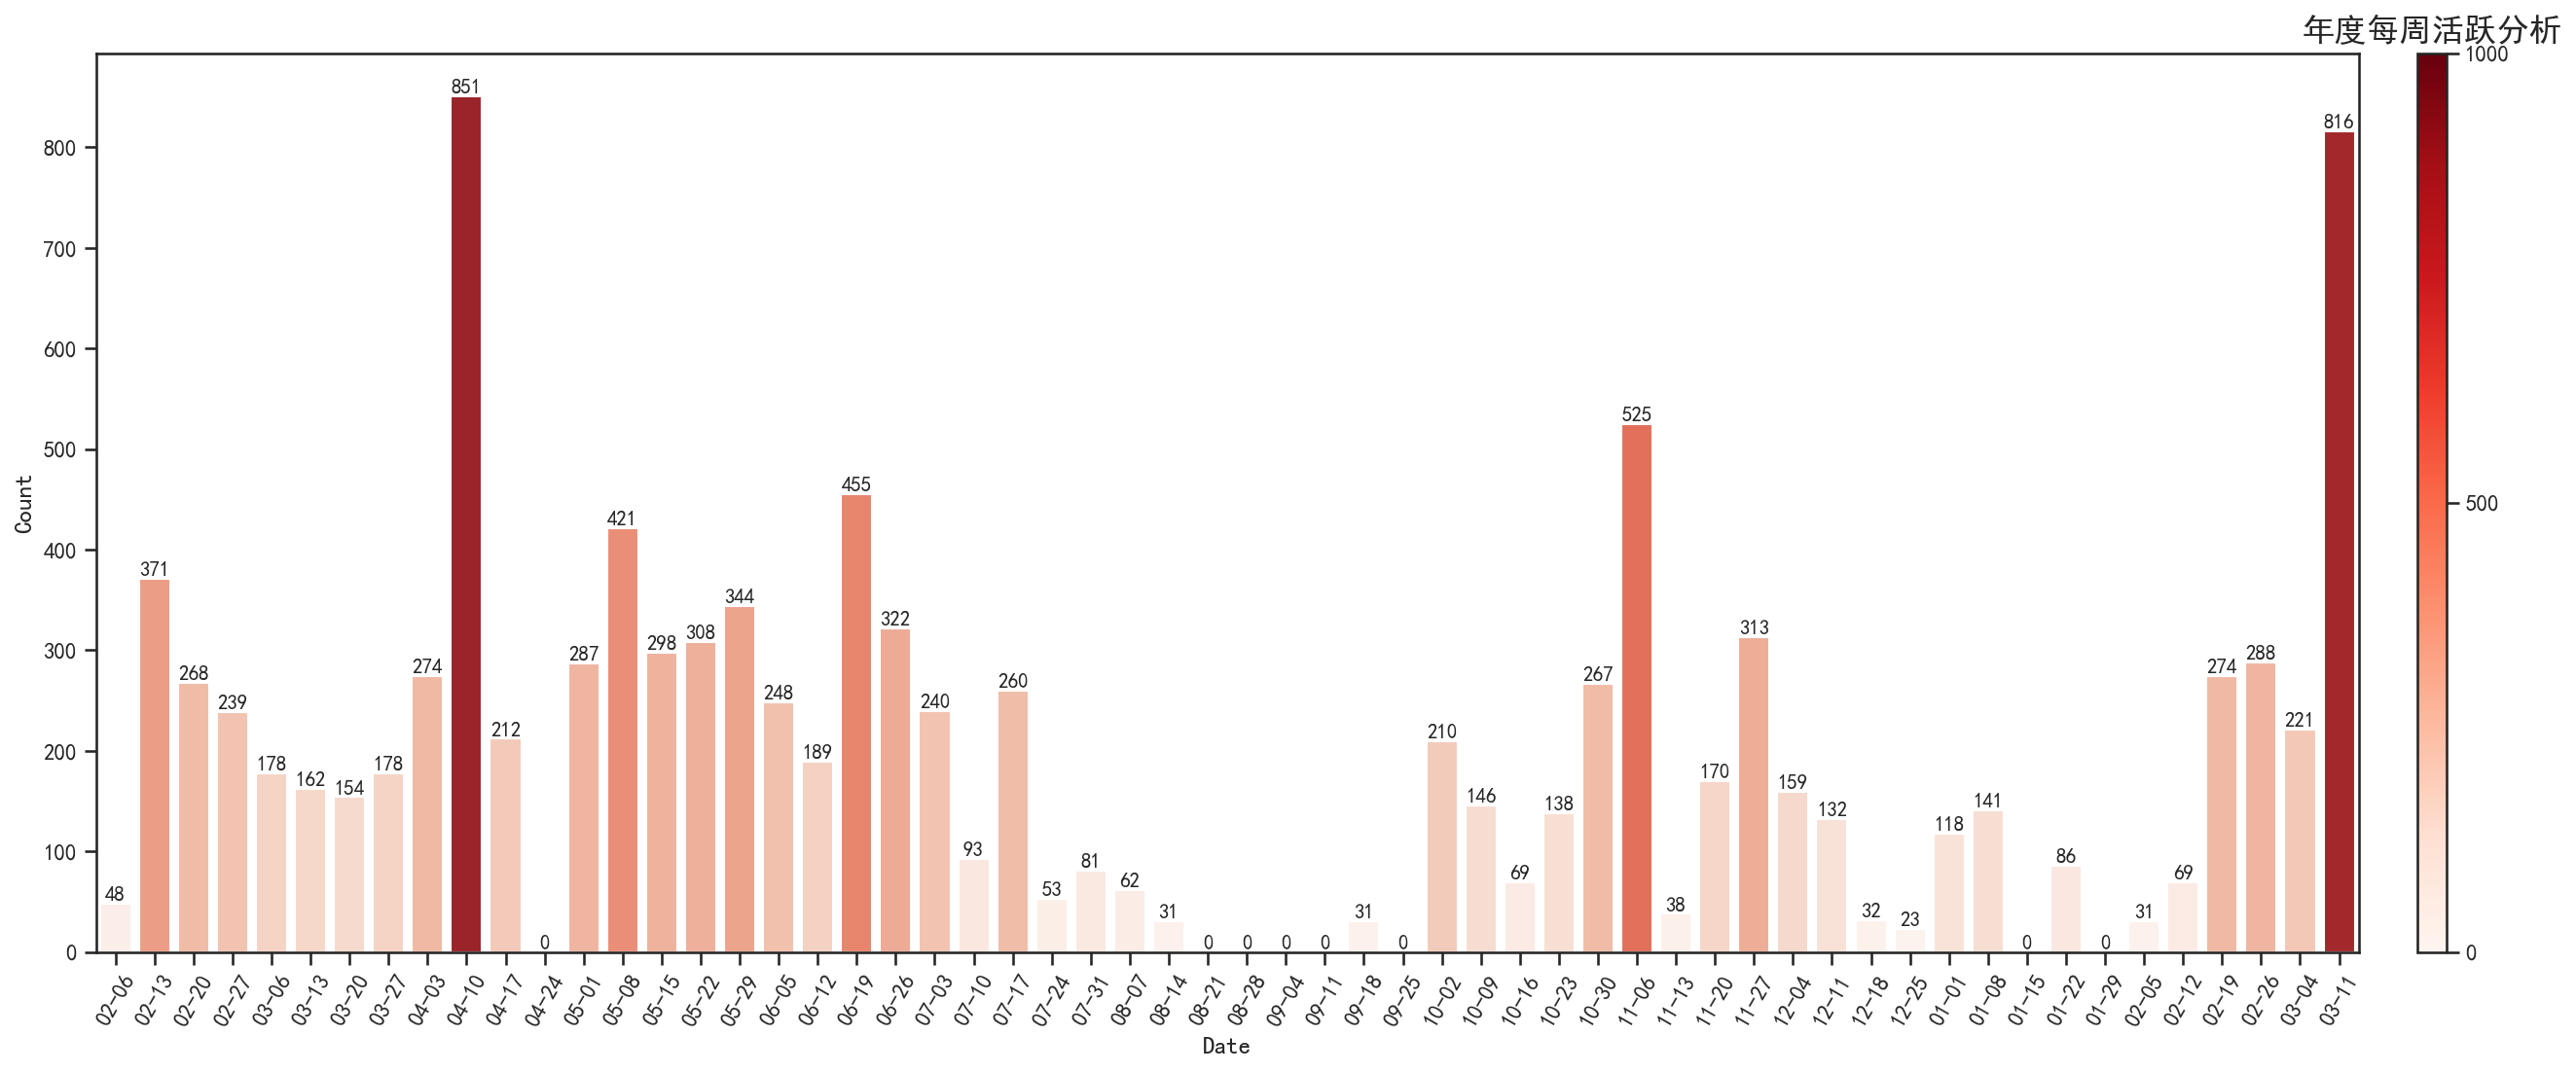

In [40]:
grouper = pd.Grouper(key="StrTime", freq="W-MON")
data = df.groupby(grouper)["Count"].sum().to_frame()
data.index = pd.date_range(start=wStart, end=wEnd, freq="W-MON").strftime("%m-%d")
data.columns = ["Count"]

vM = np.ceil(data["Count"].max() / wTicks) * wTicks
norm = plt.Normalize(0, vM)
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)

ax = sns.barplot(x=data.index, y=data["Count"], hue=data["Count"], hue_norm=norm, palette="Reds")
ax.set_xlabel("Date")
plt.xticks(rotation=60)
for bar in ax.containers:
    ax.bar_label(bar, fontsize=10, fmt="%.0f")
ax.get_legend().remove()

axpos = ax.get_position()
caxpos = mtransforms.Bbox.from_extents(axpos.x1 + 0.02, axpos.y0, axpos.x1 + 0.03, axpos.y1)
cax = ax.figure.add_axes(caxpos)

locator = mticker.MultipleLocator(wTicks)
formatter = mticker.StrMethodFormatter("{x:.0f}")
cax.figure.colorbar(sm, cax=cax, ticks=locator, format=formatter)

ax.figure.set_size_inches(20, 8)
ax.figure.set_dpi(150)
plt.rcParams['font.sans-serif'] = ['SimHei']  # ÊåáÂÆö‰∏≠ÊñáÂ≠ó‰Ωì
plt.title('Âπ¥Â∫¶ÊØèÂë®Ê¥ªË∑ÉÂàÜÊûê', fontsize=16)
plt.show()
plt.close()

### ÊåâÂë®ÂàíÂàÜËÅäÂ§©ÁÉ≠ÊÉÖÂàÜÊûê
ÂàíÂàÜÊØè7Â§©ÂÜÖÁöÑËÅäÂ§©ÁÉ≠ÊÉÖÊåáÊï∞ÔºåËÅäÂ§©ÁÉ≠ÊÉÖÊåáÊï∞‰∏∫ÂèëÈÄÅÁöÑÊ∂àÊÅØÊï∞ÂáèÂéªÊî∂Âà∞ÁöÑÊ∂àÊÅØÊï∞‰∏éÊÄªÊ∂àÊÅØÊï∞ÁöÑÊØîÂÄºÔºö
$$
E = \frac{Q_\mathrm{S} - Q_\mathrm{R}}{Q_\mathrm{S} + Q_\mathrm{R}}
$$

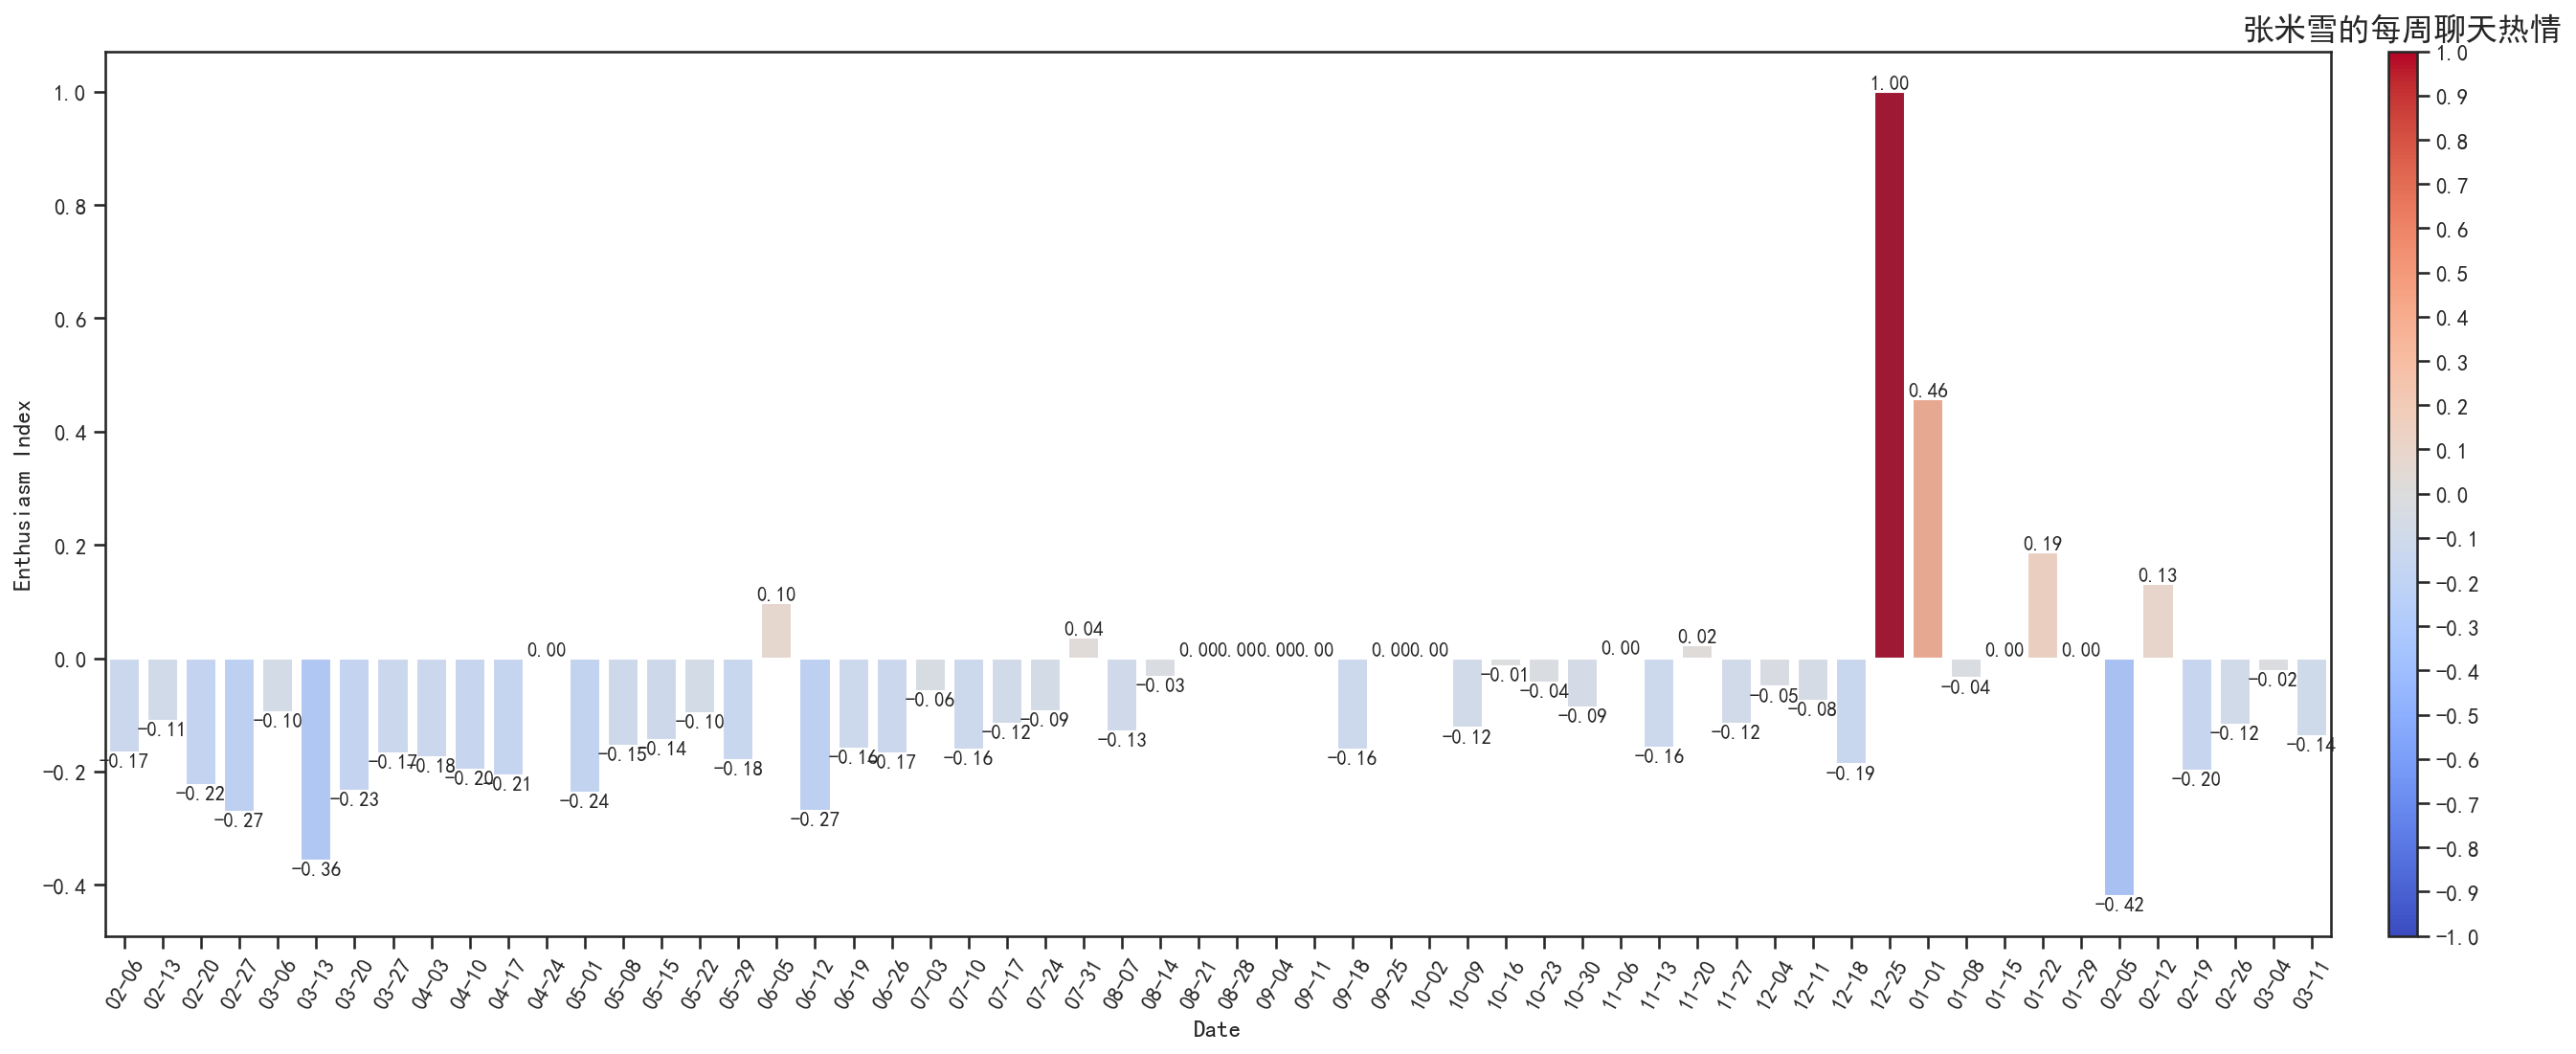

In [41]:
grouper = pd.Grouper(key="StrTime", freq="W-MON")
df_W1 = dfs[0].groupby(grouper)["Count"].sum()
df_W2 = dfs[1].groupby(grouper)["Count"].sum()

# Ê∑ªÂä†Êù°‰ª∂Âà§Êñ≠Â§ÑÁêÜÂàÜÊØç‰∏∫Èõ∂ÁöÑÊÉÖÂÜµ
denominator = df_W1 + df_W2
data = pd.DataFrame({"E": np.where(denominator != 0, (df_W1 - df_W2) / denominator, 0)})
data.index = pd.date_range(start=wStart, end=wEnd, freq="W-MON").strftime("%m-%d")

vM = data["E"].abs().max()
norm = plt.Normalize(-vM, vM)
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)

ax = sns.barplot(x=data.index, y=data["E"], hue=data["E"], hue_norm=norm, palette="coolwarm")
ax.set_xlabel("Date")
plt.xticks(rotation=60)
ax.set_ylabel("Enthusiasm Index")
for bar in ax.containers:
    ax.bar_label(bar, fontsize=10, fmt="%.2f")
ax.get_legend().remove()

axpos = ax.get_position()
caxpos = mtransforms.Bbox.from_extents(axpos.x1 + 0.02, axpos.y0, axpos.x1 + 0.03, axpos.y1)
cax = ax.figure.add_axes(caxpos)

locator = mticker.MultipleLocator(0.1)
formatter = mticker.StrMethodFormatter("{x:.1f}")
cax.figure.colorbar(sm, cax=cax, ticks=locator, format=formatter)

ax.figure.set_size_inches(20, 8)
ax.figure.set_dpi(150)
plt.rcParams['font.sans-serif'] = ['SimHei']  # ÊåáÂÆö‰∏≠ÊñáÂ≠ó‰Ωì
plt.title('Âº†Á±≥Èõ™ÁöÑÊØèÂë®ËÅäÂ§©ÁÉ≠ÊÉÖ', fontsize=16)
plt.show()
plt.close()

### ÊåâÊó•ÂàíÂàÜÂπ¥Â∫¶Ê¥ªË∑ÉÂàÜÊûê
‰ª•ÁÉ≠ÂäõÂõæÁöÑÊñπÂºèÂ±ïÁ§∫ÊåâÊó•ÂàíÂàÜÁöÑÂπ¥Â∫¶Ê¥ªË∑ÉÊÉÖÂÜµ

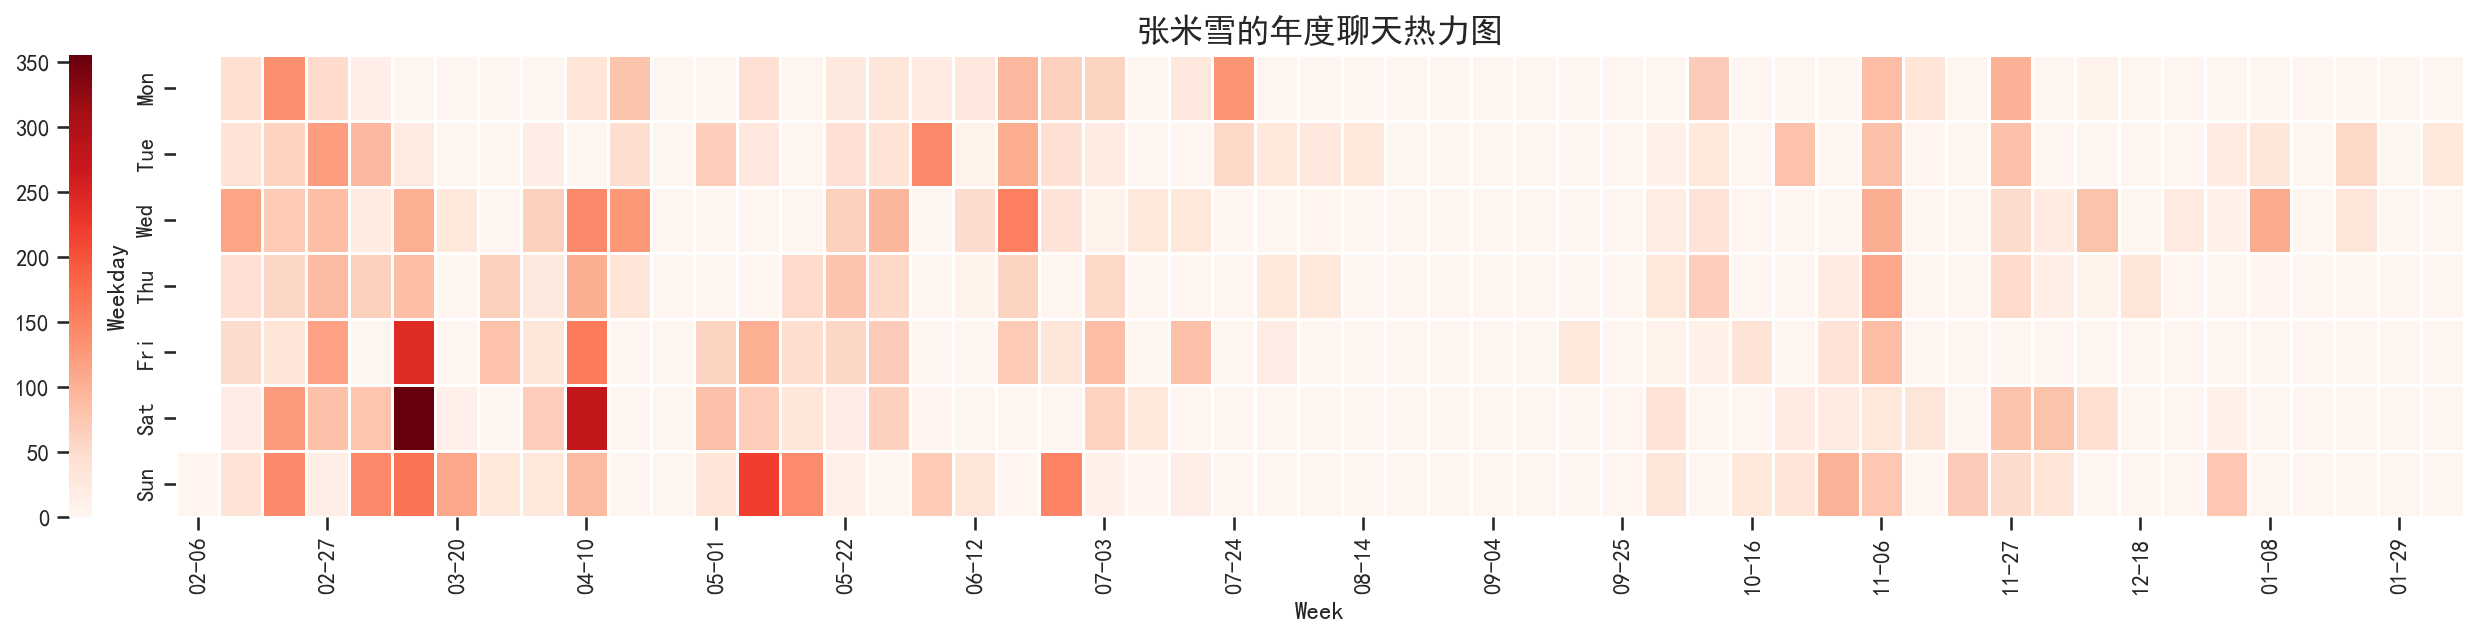

In [43]:
wTicks = 500
wStart = "2023-02-04"
wEnd = "2024-02-11"
##ËøôÈáåÂèØËÉΩ‰ºöÊä•ÈîôÂÖÉÁ¥†Êï∞ÁªÑÊúâÈóÆÈ¢òÔºåÊ≤°ÊúâÂÖ≥Á≥ªÂ§ö‰∫ÜÂ∞±Êää‰∏äÈù¢ÁöÑÊó∂Èó¥Âáè‰∏ÄÂáèÔºåÂ∞ë‰∫ÜÂ∞±Âä†‰∏ÄÁÇπÔºåÂáëÂ§ü‰∫ÜÂ∞±Ë°å
# grouper = pd.Grouper(key="StrTime", freq="W-MON")
# data = df.groupby(grouper)["Count"].sum().to_frame()
# data.index = pd.date_range(start=wStart, end=wEnd, freq="W-MON").strftime("%m-%d")
# data.columns = ["Count"]


grouper = pd.Grouper(key="StrTime", freq="D")
data = df.groupby(grouper)["Count"].sum()
data = data.to_frame()

data["date"] = data.index
data["week"] = data["date"].dt.isocalendar()["week"]
data["day"] = data["date"].dt.dayofweek
data.index = range(len(data))
for i in range(7):
    if data.loc[i, "week"] > 1:
        data.loc[i, "week"] = 0

# data = data.pivot(index="day", columns="week", values="Count")
# data.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
# data.columns = pd.date_range(start=wStart, end=wEnd, freq="W-MON").strftime("%m-%d")
data = data.pivot_table(index="day", columns="week", values="Count", aggfunc="sum")

# ÈáçÊñ∞ËÆæÁΩÆÁ¥¢ÂºïÂíåÂàó
data.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
data.columns = pd.date_range(start=wStart, end=wEnd, freq="W-MON").strftime("%m-%d")

ax = sns.heatmap(
    data,
    annot=False,
    linewidths=0.5,
    cbar_kws={"orientation": "vertical", "location": "left", "pad": 0.03},
    cmap="Reds",
)
ax.set_xlabel("Week")
ax.set_ylabel("Weekday")
ax.figure.set_size_inches(24, 4)
ax.figure.set_dpi(150)
plt.rcParams['font.sans-serif'] = ['SimHei']  # ÊåáÂÆö‰∏≠ÊñáÂ≠ó‰Ωì
plt.title('Âº†Á±≥Èõ™ÁöÑÂπ¥Â∫¶ËÅäÂ§©ÁÉ≠ÂäõÂõæ', fontsize=16)
plt.show()
plt.close()

## ËØçËØ≠ÂàÜÊûê
### ÂàÜËØçËØçÂÖ∏„ÄÅÂÅúÊ≠¢ËØç‰∏éÂéªÈô§ËØçÊÄß

In [44]:
jieba.load_userdict("thuocl.txt")
jieba.load_userdict("userdict.txt")
stopwords = [line.strip() for line in open("stopwords.txt", "r", encoding="utf-8").readlines()] + [" ", "\n", "\r\n"]
wordclass = ["v", "u", "vd", "r", "p", "w"]

### ÂàÜËØçÂáΩÊï∞

In [45]:
def wordSplit(texts, wordclass):
    words = []
    pbar = tqdm(total=len(texts))
    for i in range(len(texts)):
        res = pseg.lcut(texts[i])
        for pair in res:
            if pair.word in stopwords:
                continue
            if pair.flag in wordclass:
                continue
            words.append(pair.word)
        if i % 1000 == 0:
            pbar.update(1000)
    pbar.close()
    return words

In [46]:
words = [wordSplit(texts[i], wordclass) for i in range(2)]

4000it [00:02, 1793.79it/s]                          
4000it [00:02, 1433.58it/s]                          


### ËØç‰∫ëÁªòÂà∂
* `font`: Â≠ó‰ΩìË∑ØÂæÑÔºåËá≥Â∞ëÊîØÊåÅ‰∏≠ÊñáÔºåÊúÄÂ•ΩÂêåÊó∂ÊîØÊåÅ‰∏≠ÊñáÂíåemoji
* `mask`: ËØç‰∫ëÁöÑËíôÁâàÔºåÂΩ±ÂìçËØç‰∫ëÁöÑÂΩ¢Áä∂
* `cmap`: Ëâ≤Èò∂

In [47]:
font = "simsun.ttc"
mask = np.array(Image.open("mask.png"))
masks = [np.array(Image.open("mask_L.jpg")), np.array(Image.open("mask_F.jpg"))]
cmap = ListedColormap(
    [
        "#fac1cf",
        "#a9d7ba",
        "#58b1db",
        "#f296ab",
        "#5dab81",
        "#3d9ec4",
        "#e16a8d",
        "#237b50",
        "#1e8299",
        "#8d3549",
        "#35563b",
        "#2d5d73",
    ]
)

In [48]:
def wordCloud(text, font, mask, cmap):
    wc = WordCloud(
        background_color="white",
        scale=5,
        font_path=font,
        mask=mask,
        colormap=cmap,
        collocations=False,
    ).generate(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

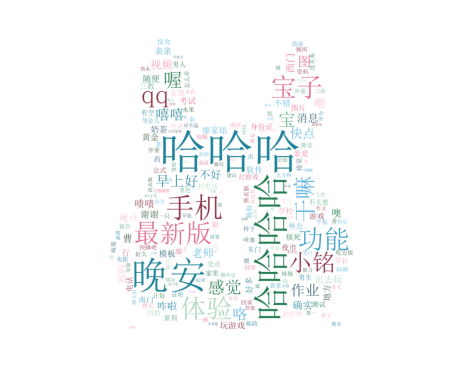

In [52]:
wordCloud(" ".join(words[0]), font, masks[0], cmap)

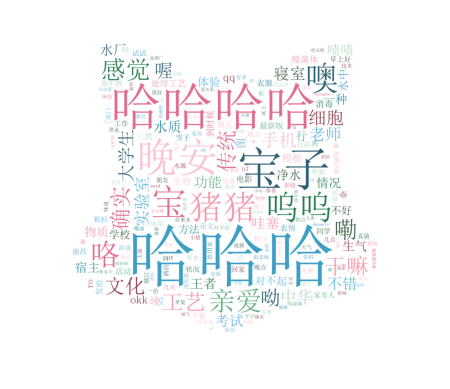

In [50]:
wordCloud(" ".join(words[1]), font, masks[1], cmap)

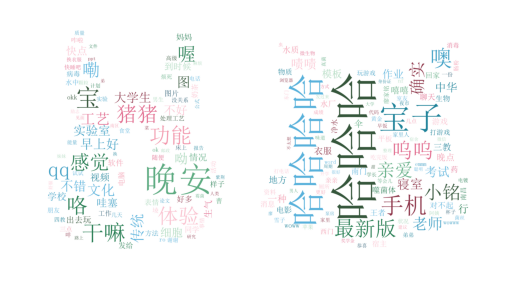

In [53]:
wordCloud(" ".join(words[0] + words[1]), font, mask, cmap)

### È´òÈ¢ëËØçÊéíË°å
ÂàóÂá∫Â∏∏Áî®ÁöÑ N ‰∏™ËØçÔºåÂπ∂‰∏îÂ±ïÁ§∫ÂèåÊñπÁöÑË¥°ÁåÆ
* `wN`: ËØçÁöÑÊï∞ÁõÆÔºåÈªòËÆ§‰∏∫50

In [54]:
wN = 50

In [55]:
data = pd.DataFrame(
    {
        "words": words[0] + words[1],
        "L": [1] * len(words[0]) + [0] * len(words[1]),
        "F": [0] * len(words[0]) + [1] * len(words[1]),
        "S": [1] * len(words[0]) + [1] * len(words[1]),
    }
)

grouper = pd.Grouper(key="words")
data = data.groupby(grouper).sum()
data = data.sort_values(by="S", ascending=False)
data = data.iloc[:wN]

In [56]:
# Â∞ÜÈÉ®ÂàÜÊó†Ê≥ïËØÜÂà´ÁöÑ emoji ËΩ¨Âåñ‰∏∫ÊñáÂ≠ó
tmp = data.index.to_list()
for i in range(wN):
    if tmp[i] == "üòò":
        tmp[i] = "[‰∫≤‰∫≤]"
    elif tmp[i] == "üòÇ":
        tmp[i] = "[Á¨ëÂì≠]"
    elif tmp[i] == "ü§¶":
        tmp[i] = "[ÊçÇËÑ∏]"
    elif tmp[i] == "üòÅ":
        tmp[i] = "[Âë≤Áâô]"
data.index = tmp

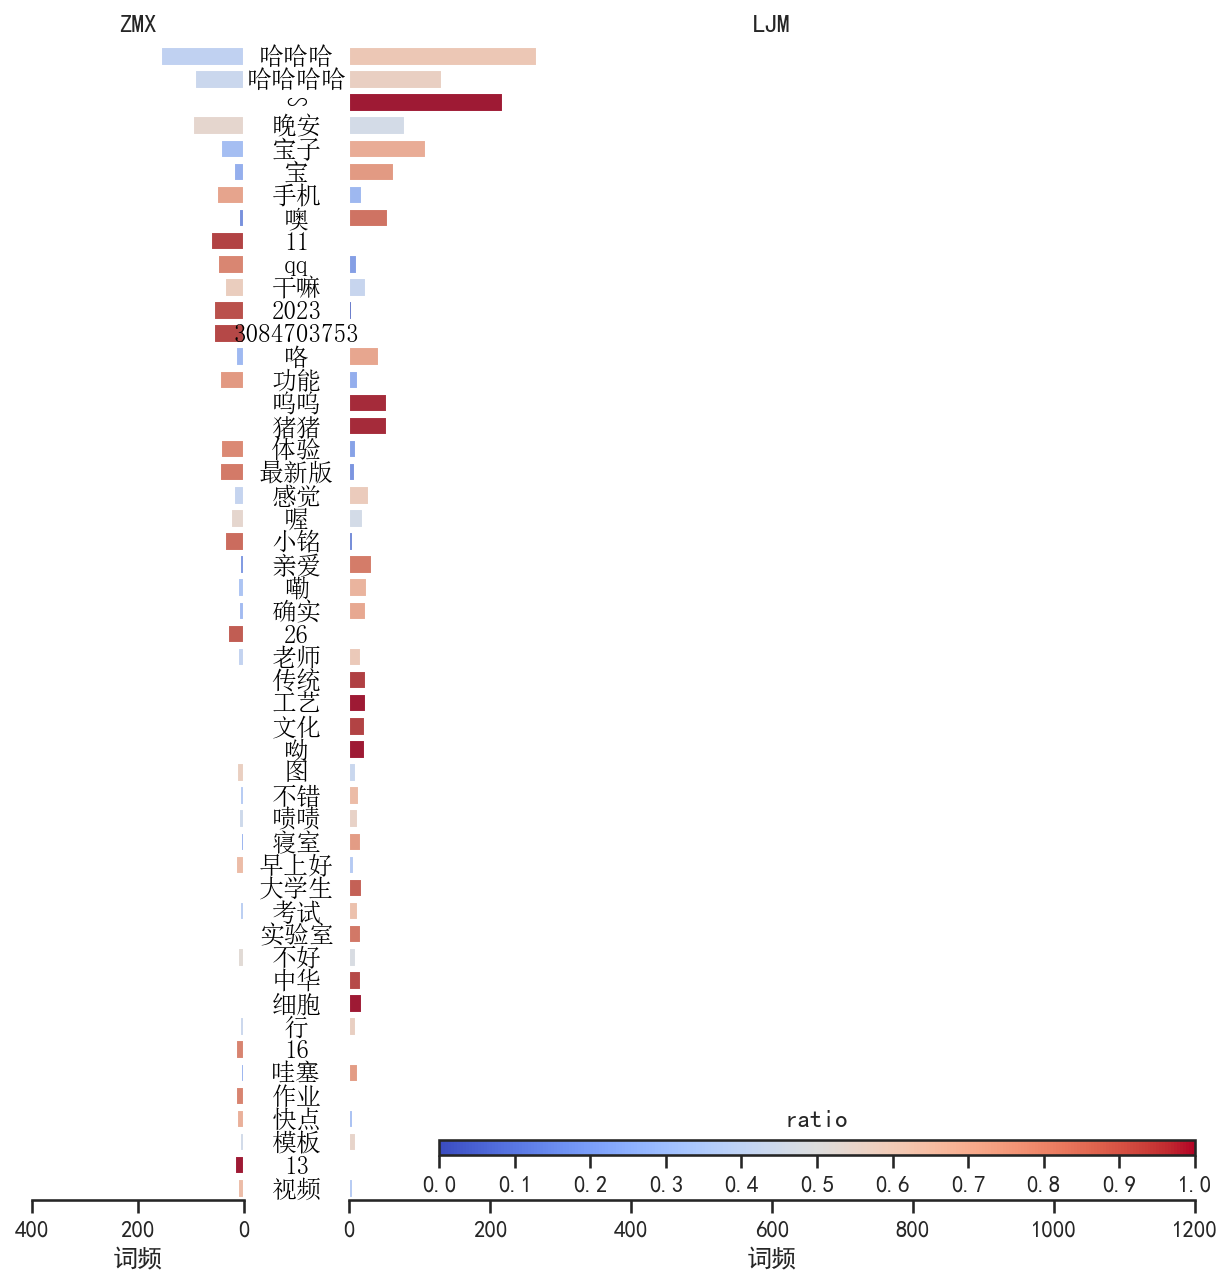

In [58]:
ratio = data["L"] / data["S"]
norm = plt.Normalize(0, 1)
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)

fig = plt.figure(figsize=(10, 10), dpi=300)
grid = plt.GridSpec(1, 4, wspace=0.5)

ax0 = fig.add_subplot(grid[0, 0])
sns.barplot(x=-data["L"], y=data.index, ax=ax0, hue=ratio, hue_norm=norm, palette="coolwarm")
ax1 = fig.add_subplot(grid[0, 1:])
sns.barplot(x=data["F"], y=data.index, ax=ax1, hue=(1 - ratio), hue_norm=norm, palette="coolwarm")

ax0.set_xlabel("ËØçÈ¢ë")
ax0.set_ylabel("")
ax0.set_xticks(range(-400, 1, 200))
ax0.set_xticklabels([400, 200, 0])
ax0.set_xlim(-400, 0)
ax0.set_yticks([])
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.set_title("ZMX")
ax0.get_legend().remove()

ax1.set_xlabel("ËØçÈ¢ë")
ax1.set_ylabel("")
ax1.set_xticks(range(0, 1201, 200))
ax1.set_xticklabels([0, 200, 400, 600, 800, 1000, 1200])
ax1.set_xlim(0, 1200)
ax1.set_yticks([])
ax1.spines["left"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.set_title("LJM")
ax1.get_legend().remove()

axpos = ax1.get_position()
caxpos = mtransforms.Bbox.from_extents(axpos.x0 + 0.06, axpos.y0 + 0.03, axpos.x1, axpos.y0 + 0.04)
cax = ax1.figure.add_axes(caxpos)

locator = mticker.MultipleLocator(0.1)
formatter = mticker.StrMethodFormatter("{x:.1f}")
cax.figure.colorbar(sm, cax=cax, orientation="horizontal", ticks=locator, format=formatter)
# cax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
cax.set_title("ratio")

x0 = ax0.get_position().x1
x1 = ax1.get_position().x0
xm = (x0 + x1) / 2
y0 = ax0.get_position().y0
y1 = ax0.get_position().y1

for i in range(wN):
    fig.text(
        xm, y0 + (y1 - y0) * (wN - i - 0.5) / wN, data.index[i],
        color="black", ha="center", va="center", fontproperties=fp
    )

fig.set_dpi(150)
plt.show()
plt.close()

## ÊÉÖÊÑüÂàÜÊûê
‰ΩøÁî® `paddlenlp` ËøõË°åÊÉÖÊÑüÂàÜÊûêÔºåÂæóÂà∞ÁöÑÂàÜÊï∞Âú® [-1, 1] ‰πãÈó¥ÔºåË∂äÂ∞èË∂äÊ∂àÊûÅÔºåË∂äÂ§ßË∂äÁßØÊûÅ

In [62]:
dfE = df.query("Type == 1")[["IsSender", "StrContent", "StrTime", "hour"]]
dfE.index = range(len(dfE))

In [63]:
senta = Taskflow("sentiment_analysis")

[2024-02-05 20:14:45,110] [    INFO] - Downloading model_state.pdparams from https://bj.bcebos.com/paddlenlp/taskflow/sentiment_analysis/bilstm/model_state.pdparams
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 932M/932M [03:00<00:00, 5.41MB/s] 
[2024-02-05 20:17:49,686] [    INFO] - Downloading vocab.txt from https://bj.bcebos.com/paddlenlp/taskflow/sentiment_analysis/bilstm/vocab.txt
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13.9M/13.9M [00:04<00:00, 3.62MB/s]
[2024-02-05 20:18:09,079] [    INFO] - Converting to the inference model cost a little time.
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\paddle\jit\dy2static\program_translator.py:712: UserWarning: full_graph=False don't support input_spec arguments. It will not produce any effect.
You can set full_graph=True, then you can assign input spec.

  warnings.warn(
[2024-02-05 20:19:06,828] [    INFO] - The inference model save in the path:C:\Users\admin\.paddlenlp\taskflow\sentiment_analysis\bilstm\static\inference


In [64]:
scores = pd.DataFrame(senta([textFilter(i) for i in dfE["StrContent"].to_list()]))
scores.loc[scores["label"] == "negative", "score"] = 1 - scores.loc[scores["label"] == "negative", "score"]

In [67]:
dfE["score"] = scores["score"]
dfE["score"] = 2 * dfE["score"] - 1
dfE["Person"] = dfE.apply(lambda x: labels[int(x["IsSender"]) if pd.notna(x["IsSender"]) else -1], axis=1)
dfEs = [dfE.query("IsSender == 0"), dfE.query("IsSender == 1")]


### Âπ¥Â∫¶ÊÄª‰ΩìÊÉÖÊÑüÂàÜÂ∏É

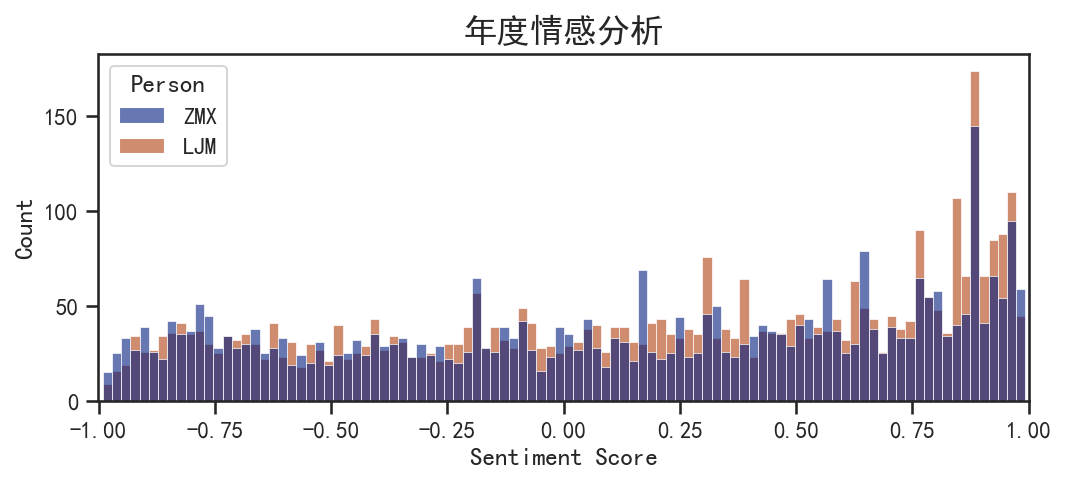

In [69]:
ax = sns.histplot(data=dfE, x="score", hue="Person", palette="dark", alpha=0.6, bins=100)

ax.set_xlabel("Sentiment Score")
ax.set_ylabel("Count")
plt.rcParams['font.sans-serif'] = ['SimHei']  # ÊåáÂÆö‰∏≠ÊñáÂ≠ó‰Ωì
plt.title('Âπ¥Â∫¶ÊÉÖÊÑüÂàÜÊûê', fontsize=16)
ax.set_xlim(-1, 1)

ax.figure.set_size_inches(8, 3)
ax.figure.set_dpi(150)
plt.show()

### ÊåâÂë®ÁªüËÆ°Âπ≥ÂùáÊÉÖÊÑüÊåáÊï∞

In [71]:
def weekAvgSenScore(df):
    grouper = pd.Grouper(key="StrTime", freq="W-MON")
    data = df.groupby(grouper)["score"].mean().to_frame()
    data.index = pd.date_range(start=wStart, end=wEnd, freq="W-MON").strftime("%m-%d")
    data.columns = ["score"]

    vM = data["score"].abs().max()
    norm = plt.Normalize(-vM, vM)
    sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)

    ax = sns.barplot(x=data.index, y=data["score"], hue=data["score"], hue_norm=norm, palette="coolwarm")
    ax.set_xlabel("Date")
    plt.xticks(rotation=60)
    for bar in ax.containers:
        ax.bar_label(bar, fontsize=10, fmt="%.2f")
    ax.get_legend().remove()

    axpos = ax.get_position()
    caxpos = mtransforms.Bbox.from_extents(axpos.x1 + 0.02, axpos.y0, axpos.x1 + 0.03, axpos.y1)
    cax = ax.figure.add_axes(caxpos)

    locator = mticker.MultipleLocator(0.05)
    formatter = mticker.StrMethodFormatter("{x:.2f}")
    cax.figure.colorbar(sm, cax=cax, ticks=locator, format=formatter)

    ax.figure.set_size_inches(20, 8)
    ax.figure.set_dpi(150)
    plt.show()
    plt.close()

    return data["score"]

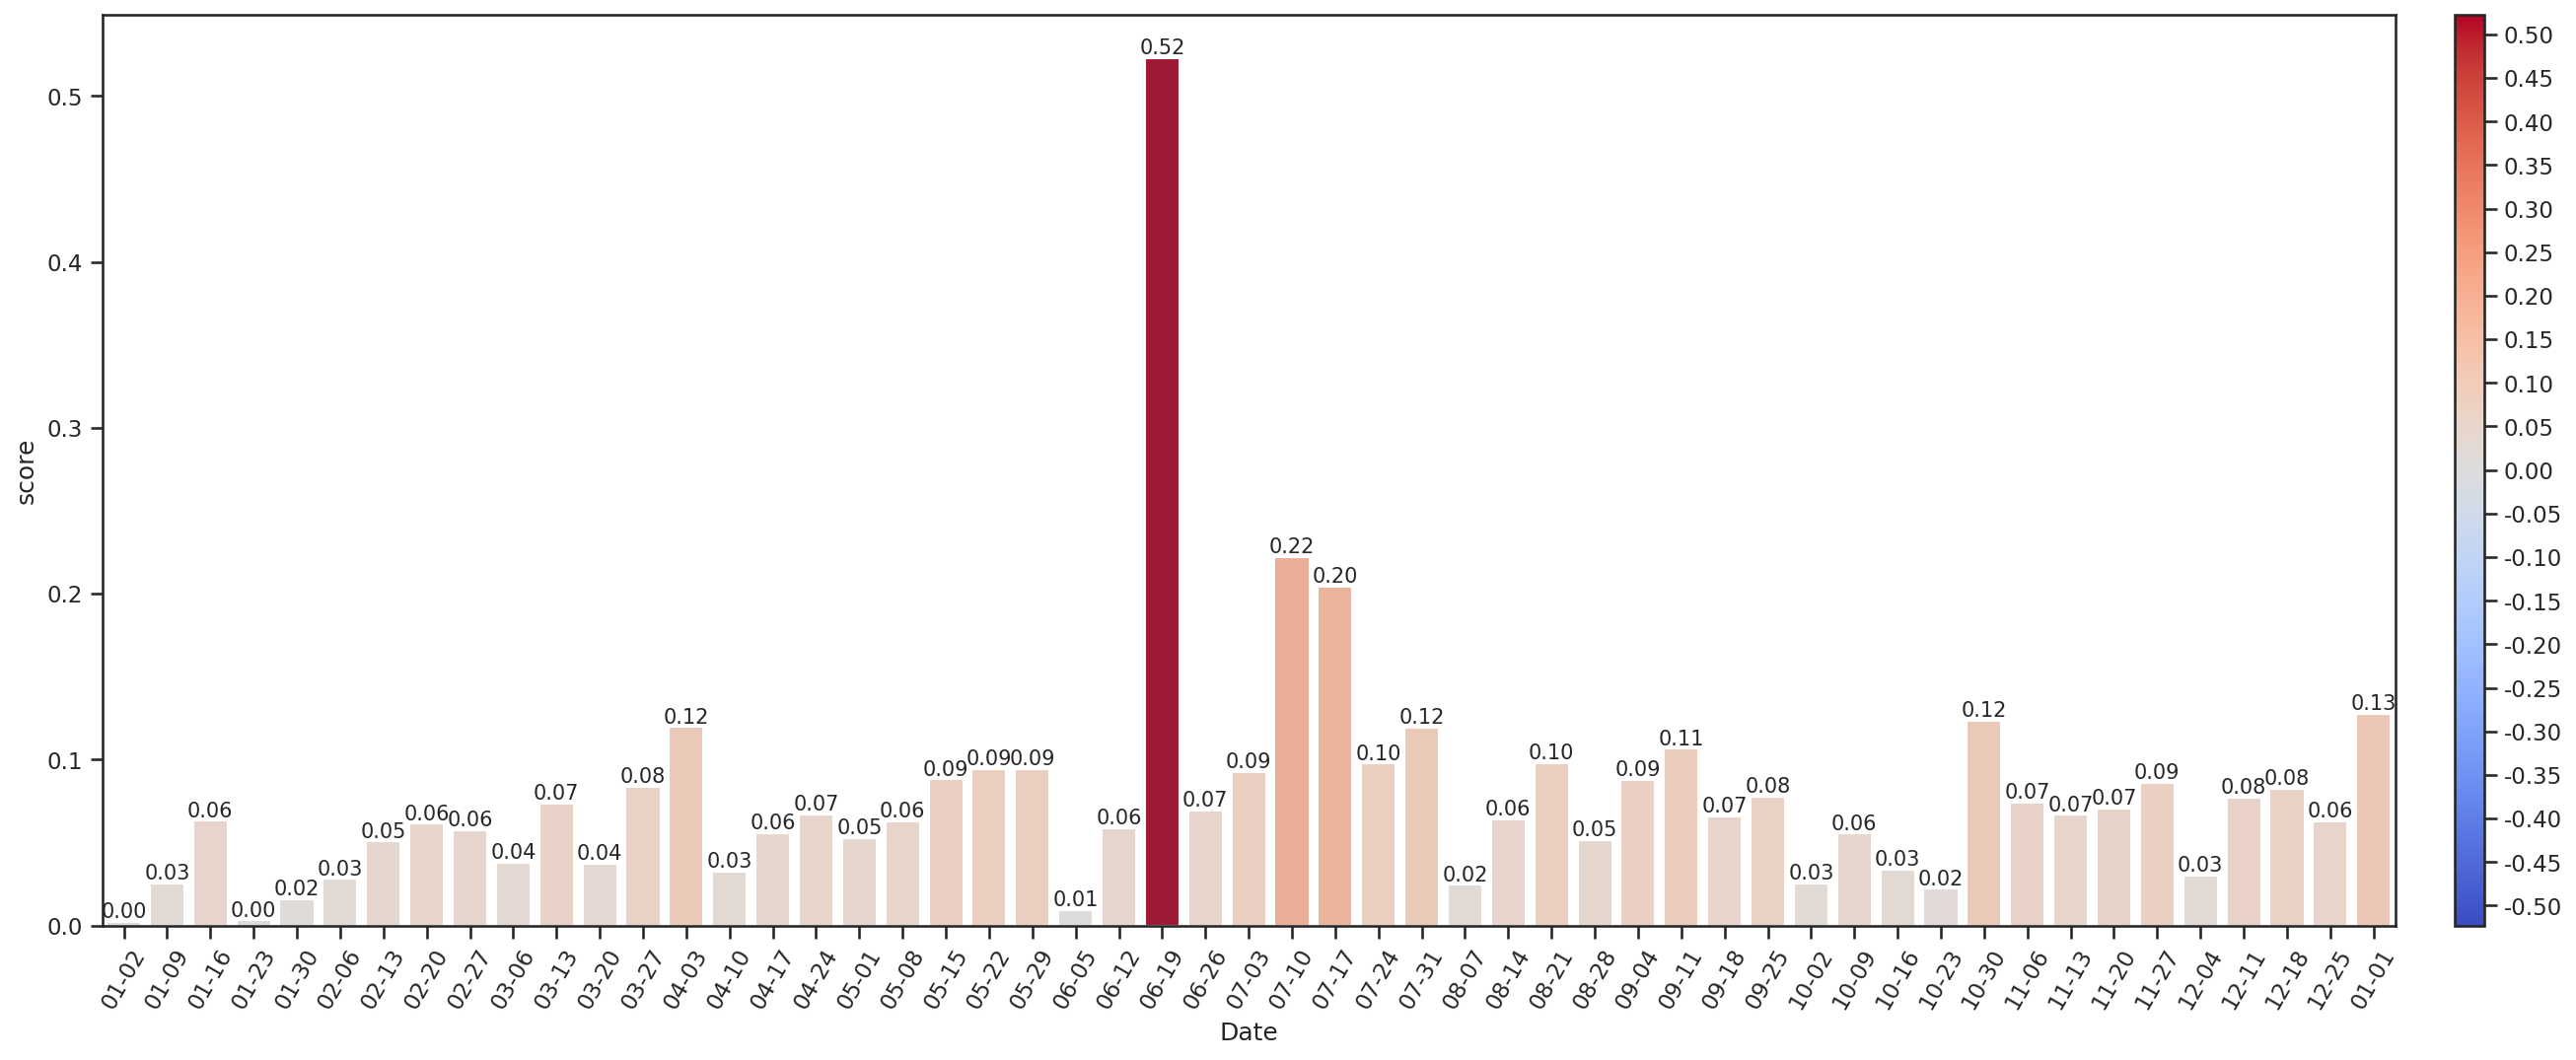

In [ ]:
avgSenScore0 = weekAvgSenScore(dfEs[0])

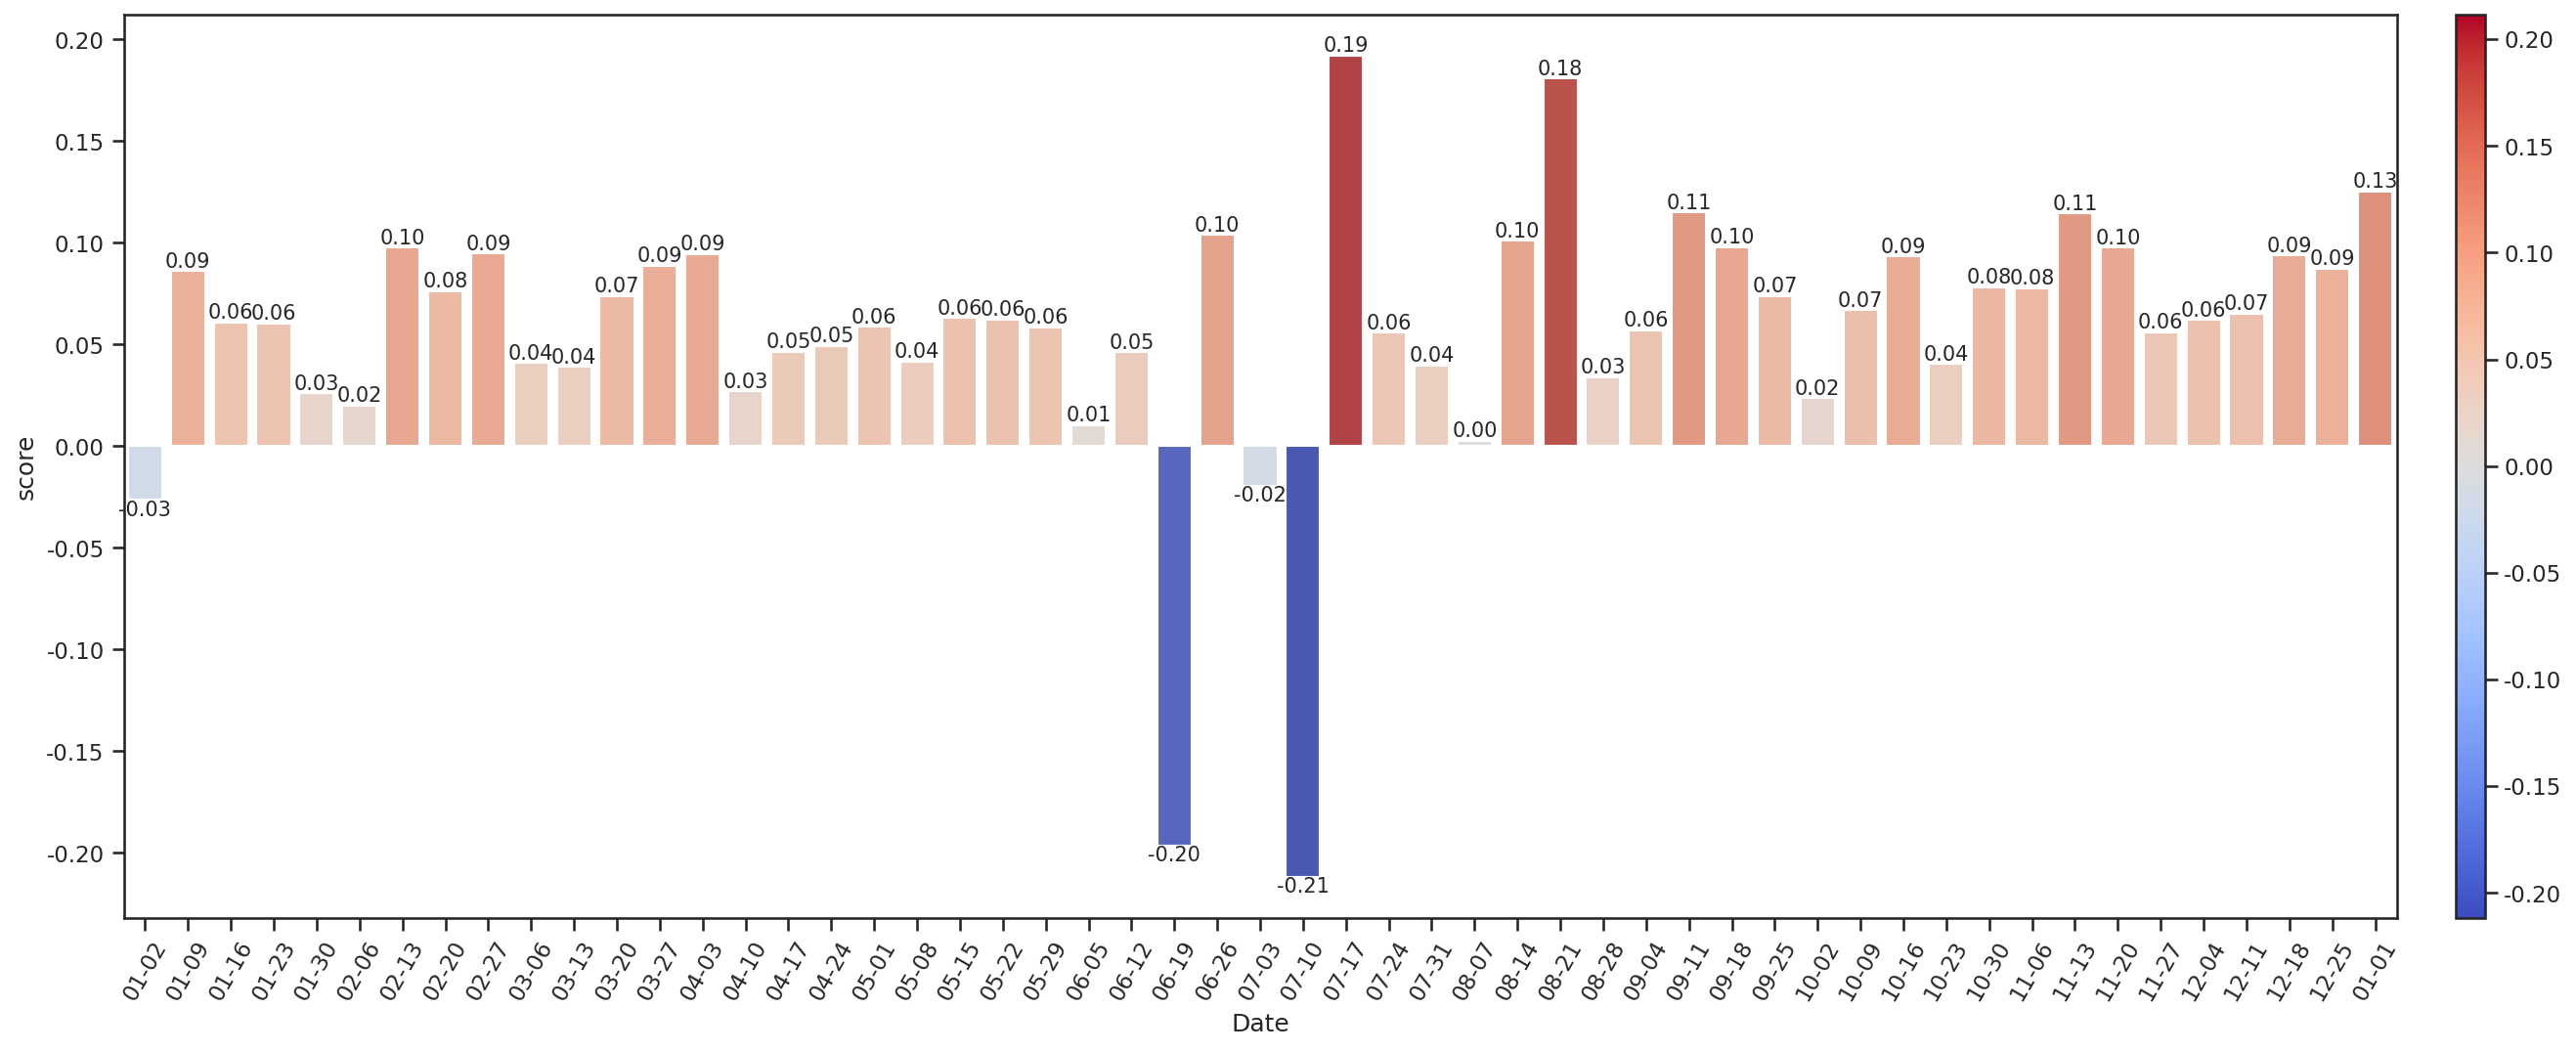

In [ ]:
avgSenScore1 = weekAvgSenScore(dfEs[1])

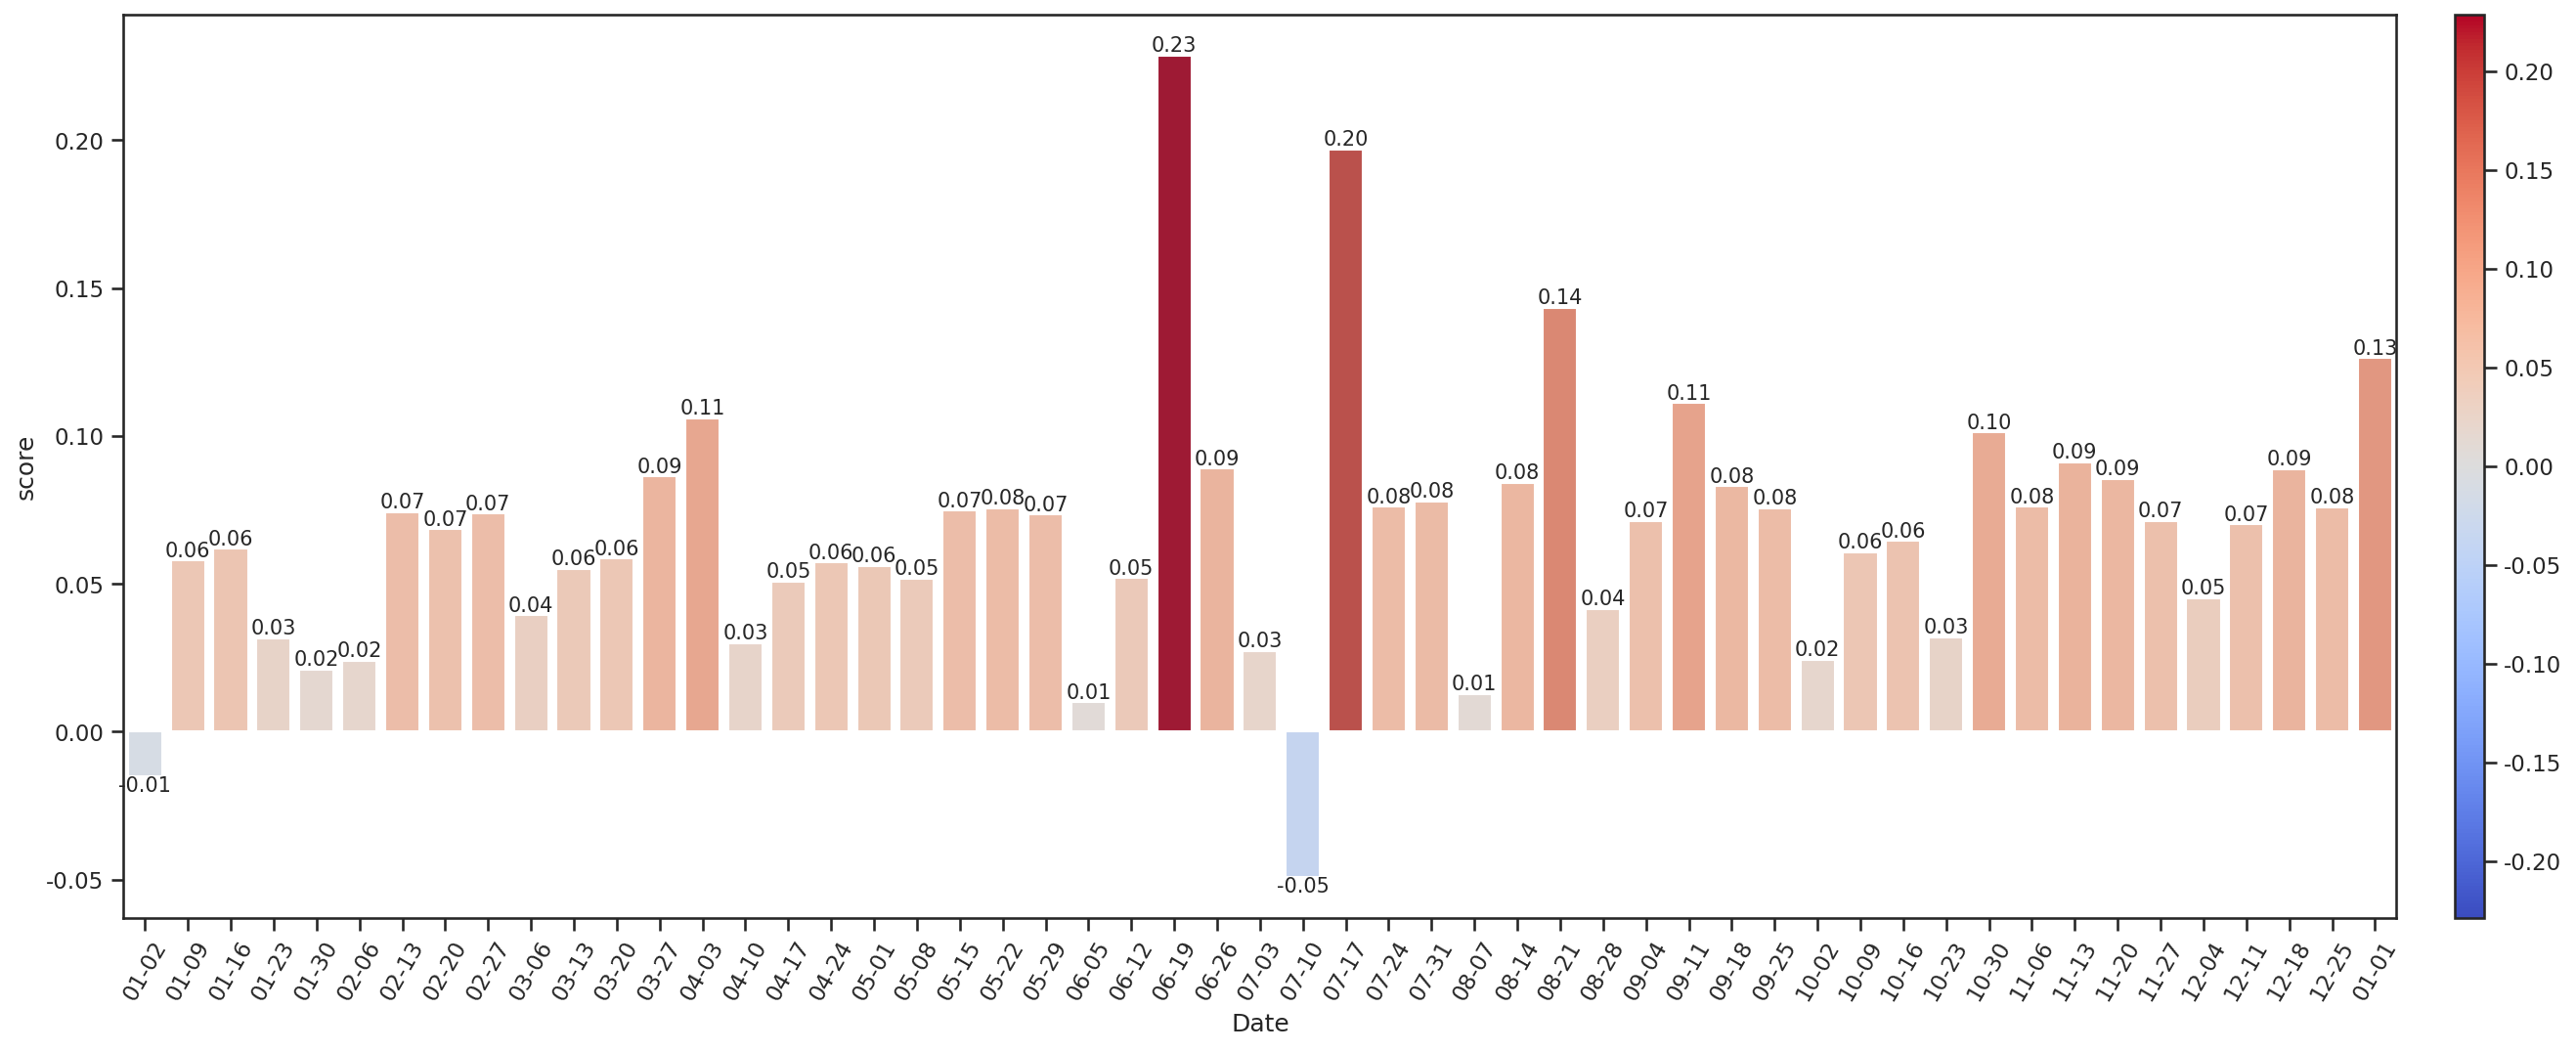

In [ ]:
_ = weekAvgSenScore(dfE)

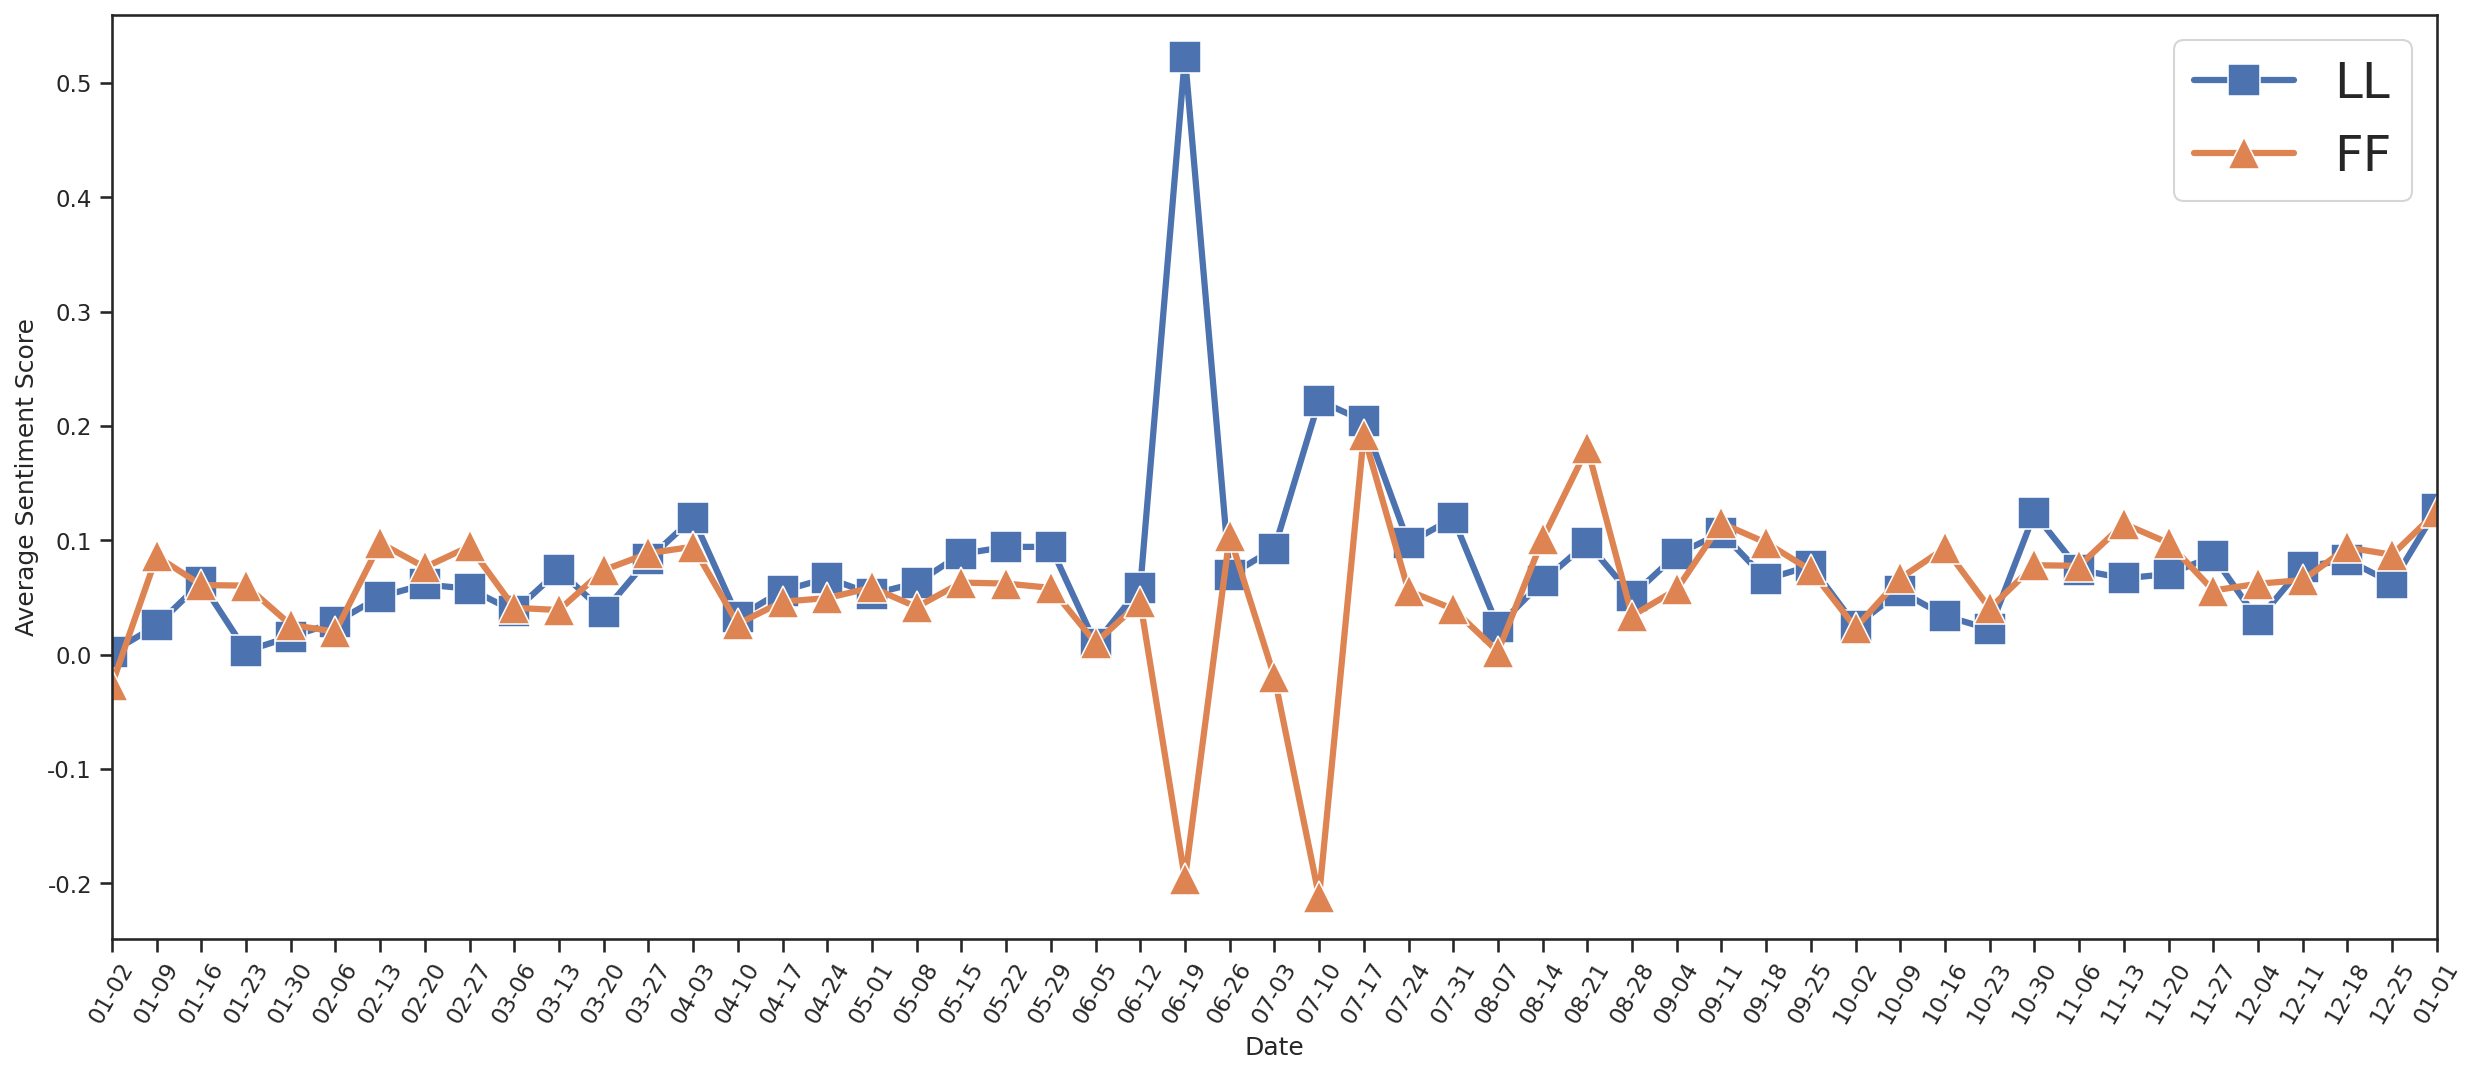

In [ ]:
ax = sns.lineplot(data=avgSenScore0, linewidth=3, marker="s", markersize=15, label=labels[0])
ax = sns.lineplot(data=avgSenScore1, linewidth=3, marker="^", markersize=15, ax=ax, label=labels[1])

ax.set_xlabel("Date")
plt.xticks(rotation=60)
ax.set_ylabel("Average Sentiment Score")
ax.set_xlim(0, 52)
ax.legend(prop={"size": 24})

ax.figure.set_size_inches(20, 8)
ax.figure.set_dpi(150)
plt.show()
plt.close()

### ÊåâÂë®ÁªüËÆ°Á¥ØËÆ°ÊÉÖÊÑüÊåáÊï∞

In [ ]:
def weekTotSenScore(df):
    grouper = pd.Grouper(key="StrTime", freq="W-MON")
    data = df.groupby(grouper)["score"].sum().to_frame()
    data.index = pd.date_range(start=wStart, end=wEnd, freq="W-MON").strftime("%m-%d")
    data.columns = ["score"]

    vM = data["score"].abs().max()
    norm = plt.Normalize(-vM, vM)
    sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)

    ax = sns.barplot(x=data.index, y=data["score"], hue=data["score"], hue_norm=norm, palette="coolwarm")
    ax.set_xlabel("Date")
    plt.xticks(rotation=60)
    for bar in ax.containers:
        ax.bar_label(bar, fontsize=10, fmt="%.2f")
    ax.get_legend().remove()

    axpos = ax.get_position()
    caxpos = mtransforms.Bbox.from_extents(axpos.x1 + 0.02, axpos.y0, axpos.x1 + 0.03, axpos.y1)
    cax = ax.figure.add_axes(caxpos)

    locator = mticker.MultipleLocator(20)
    formatter = mticker.StrMethodFormatter("{x:.2f}")
    cax.figure.colorbar(sm, cax=cax, ticks=locator, format=formatter)

    ax.figure.set_size_inches(20, 8)
    ax.figure.set_dpi(150)
    plt.show()
    plt.close()

    return data["score"]

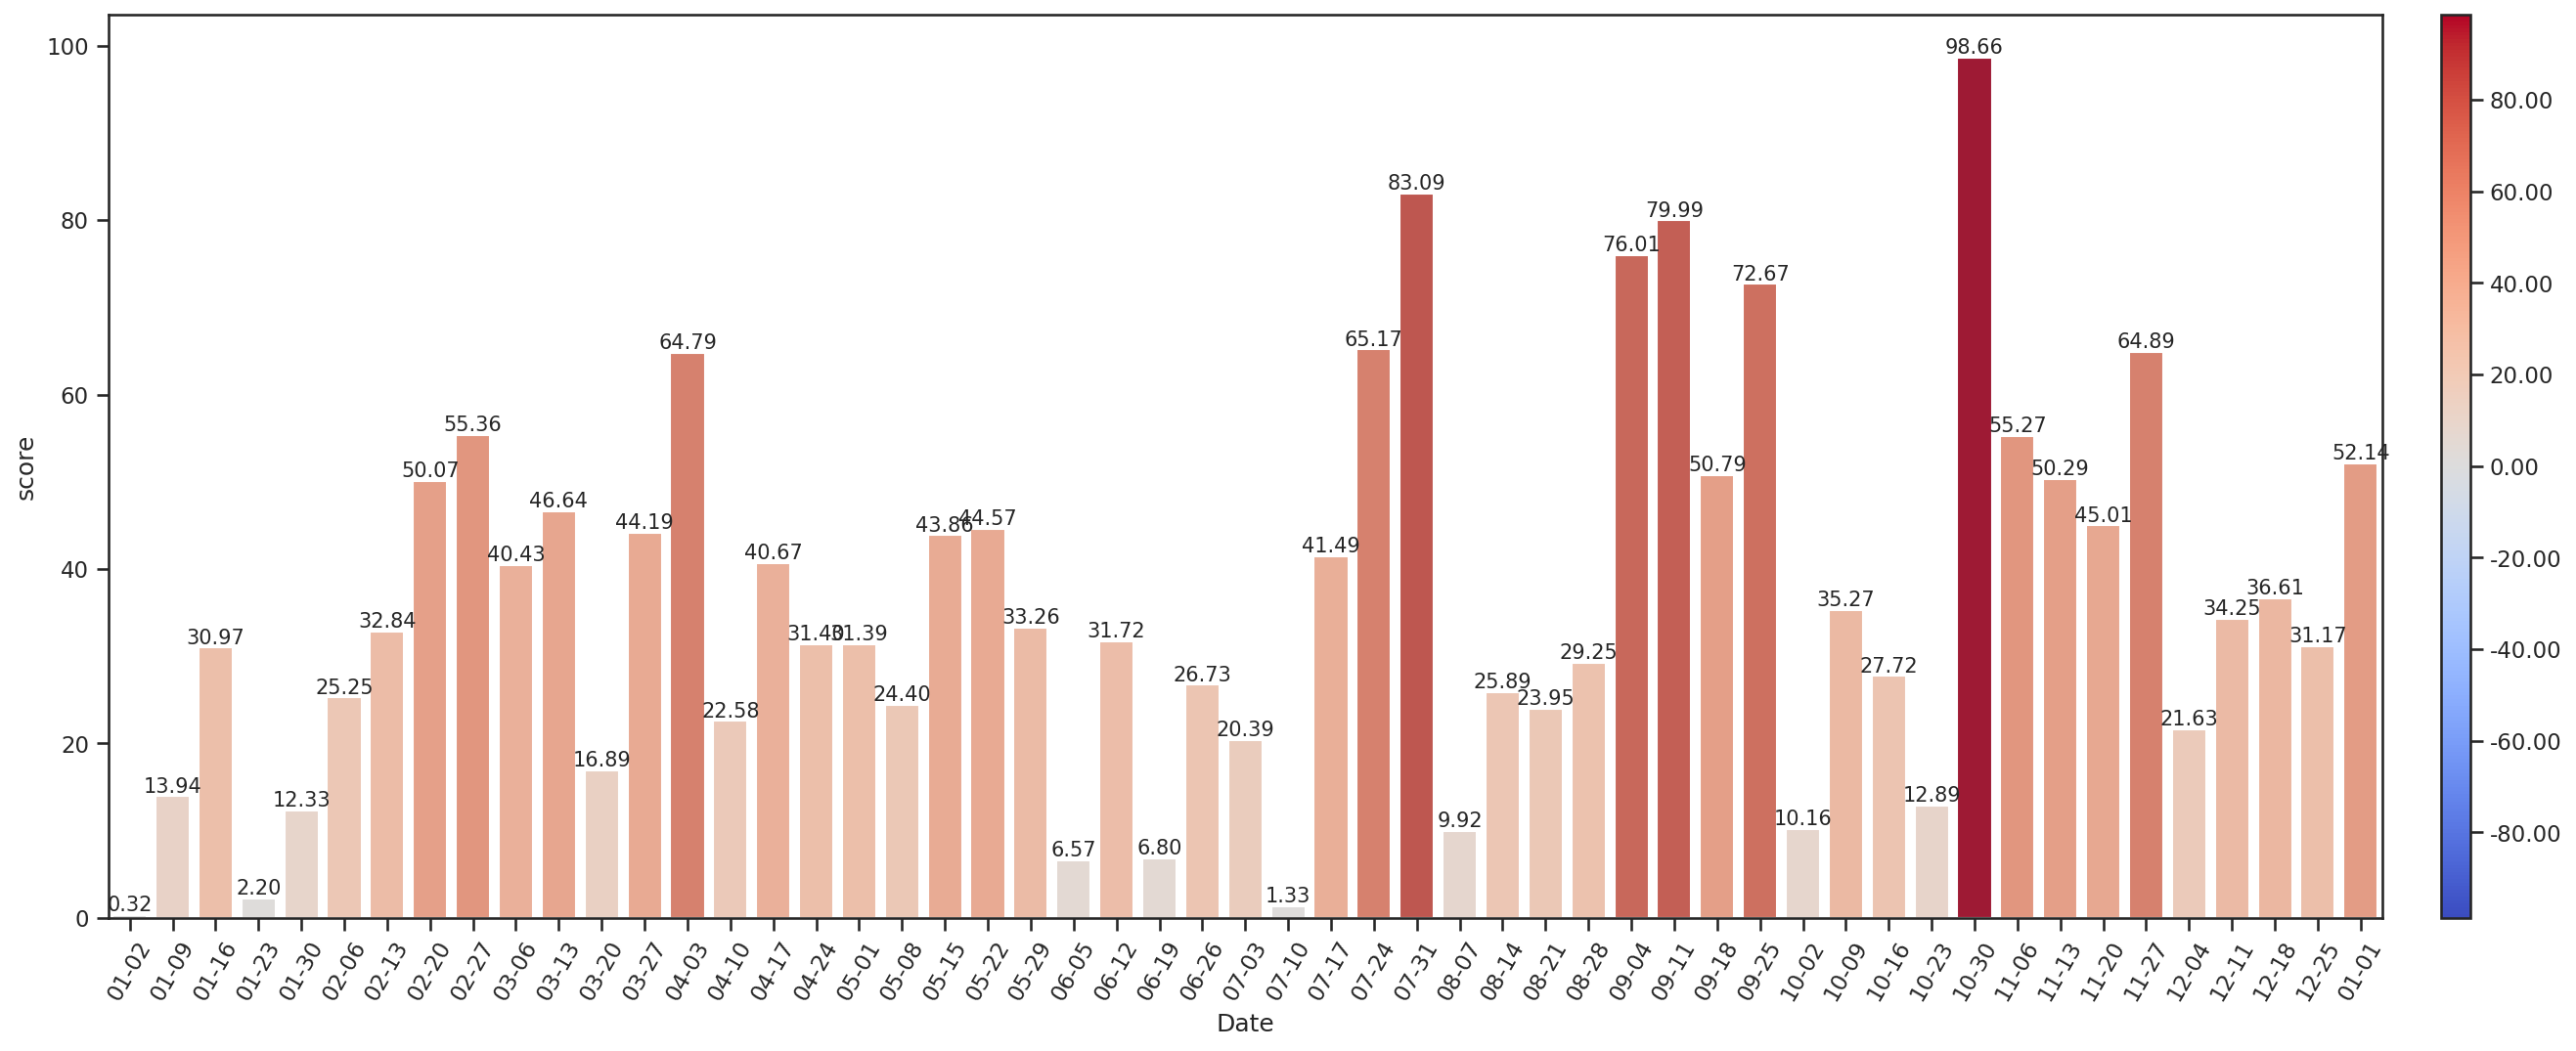

In [ ]:
totSenScore0 = weekTotSenScore(dfEs[0])

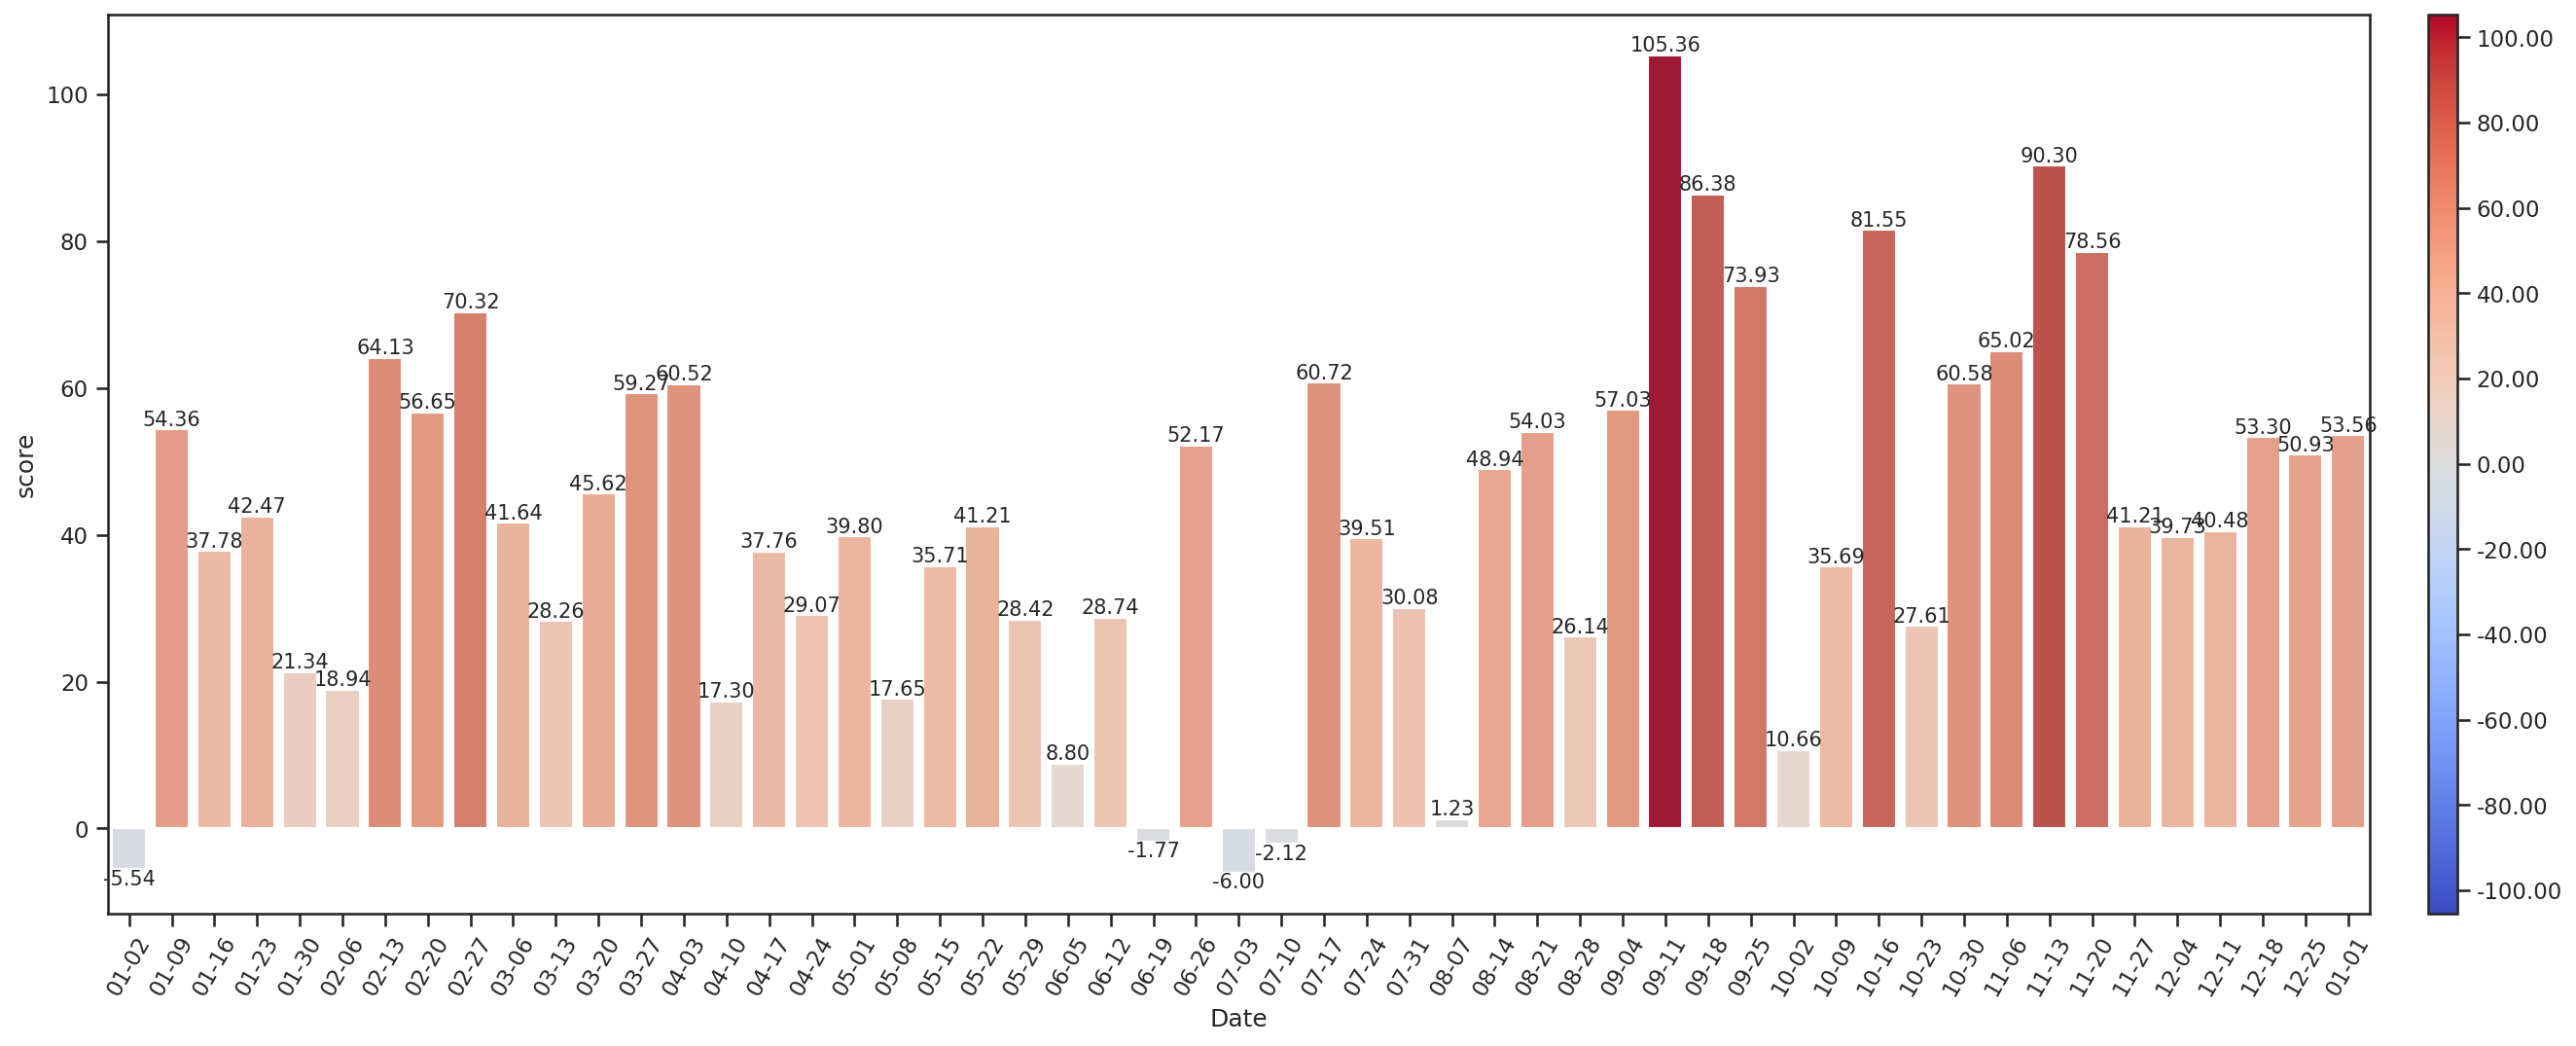

In [ ]:
totSenScore1 = weekTotSenScore(dfEs[1])

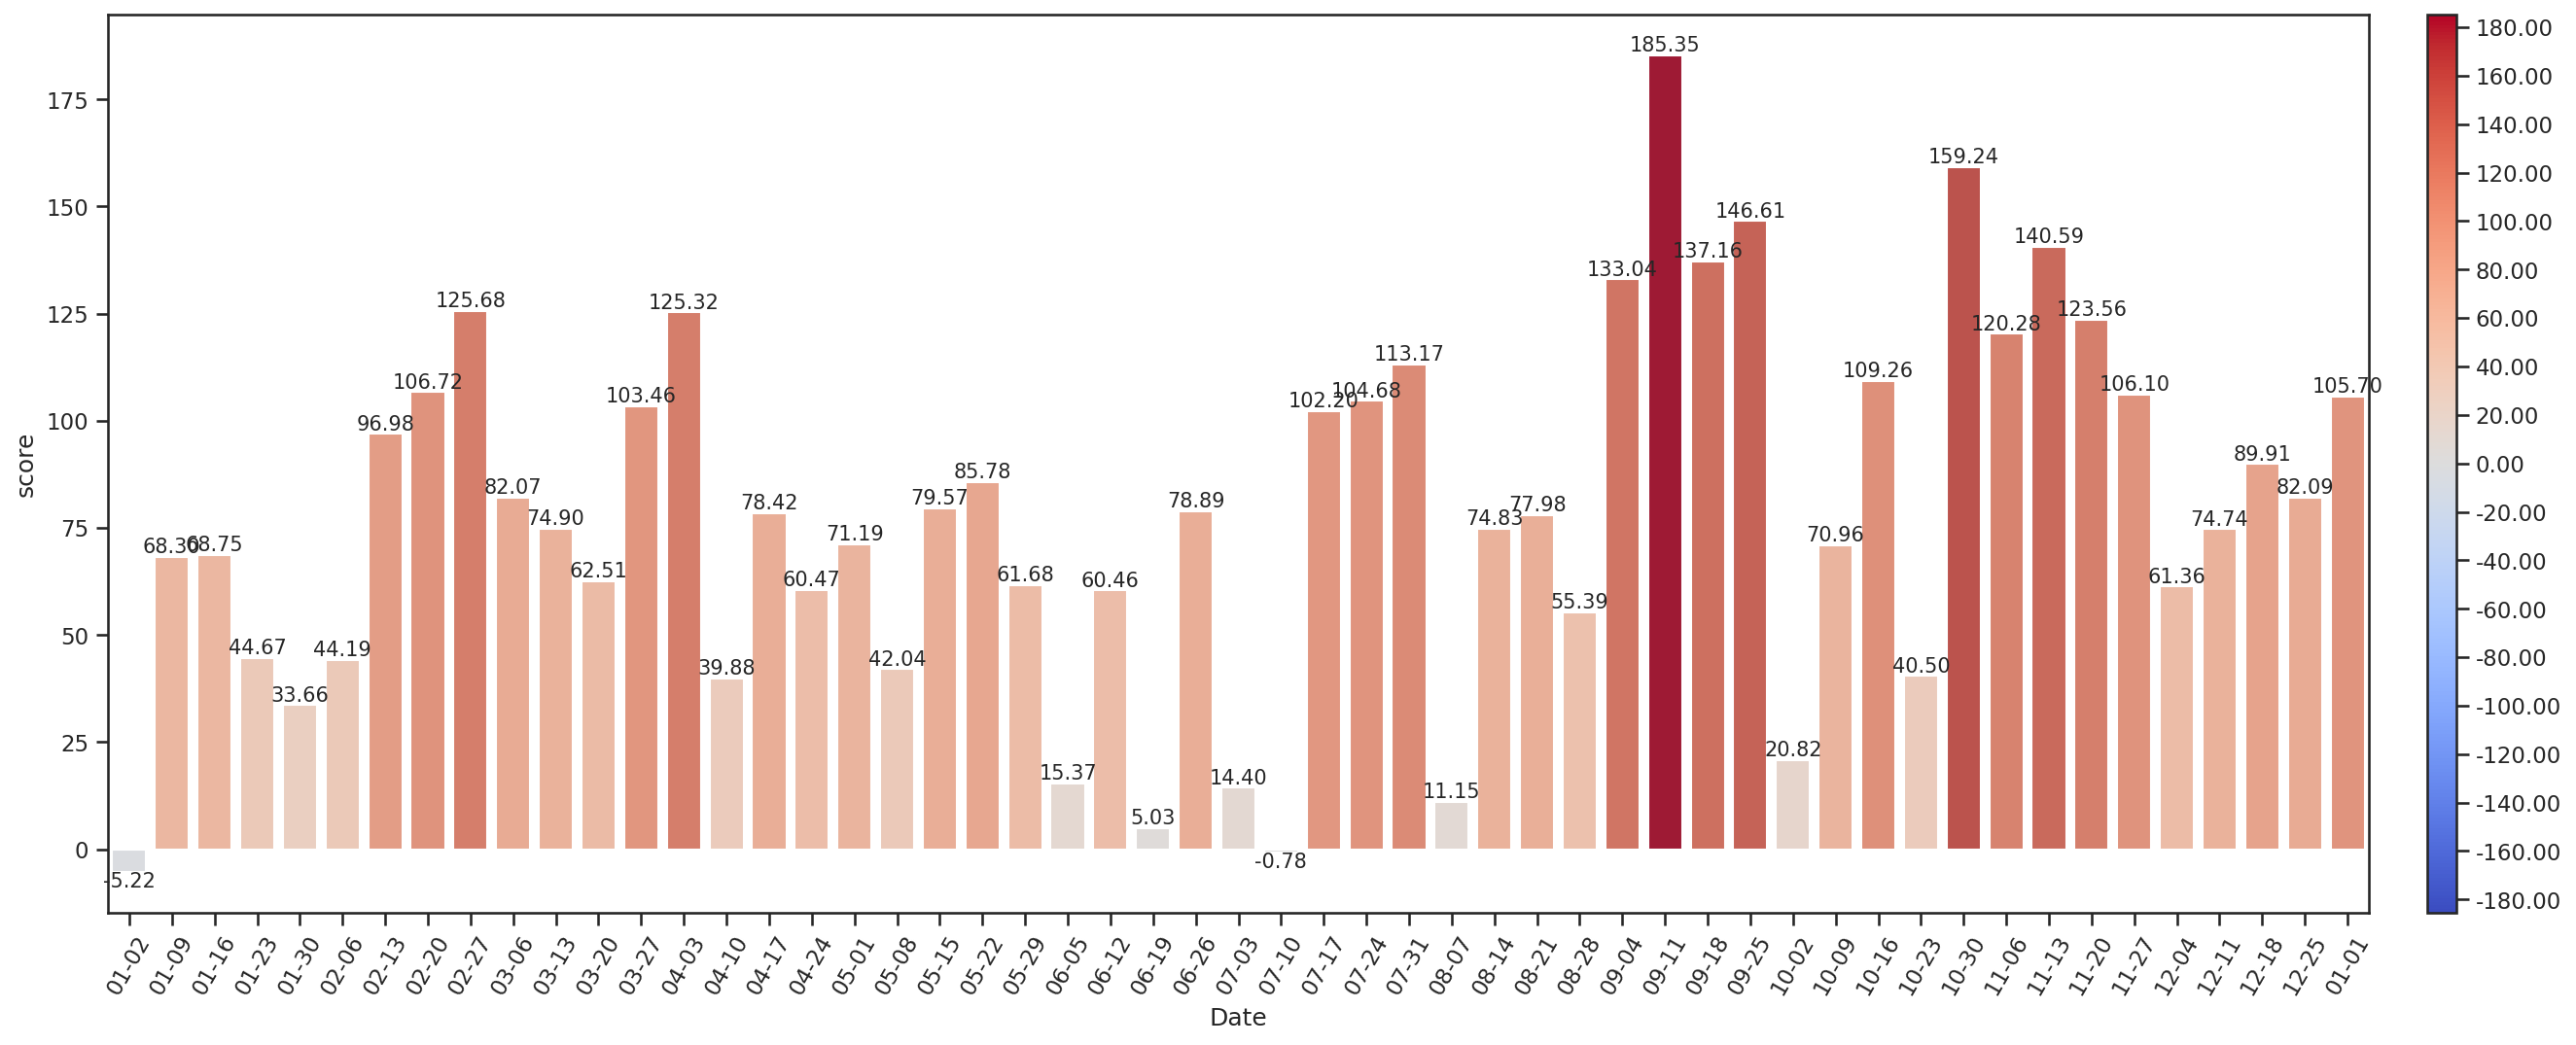

In [ ]:
_ = weekTotSenScore(dfE)

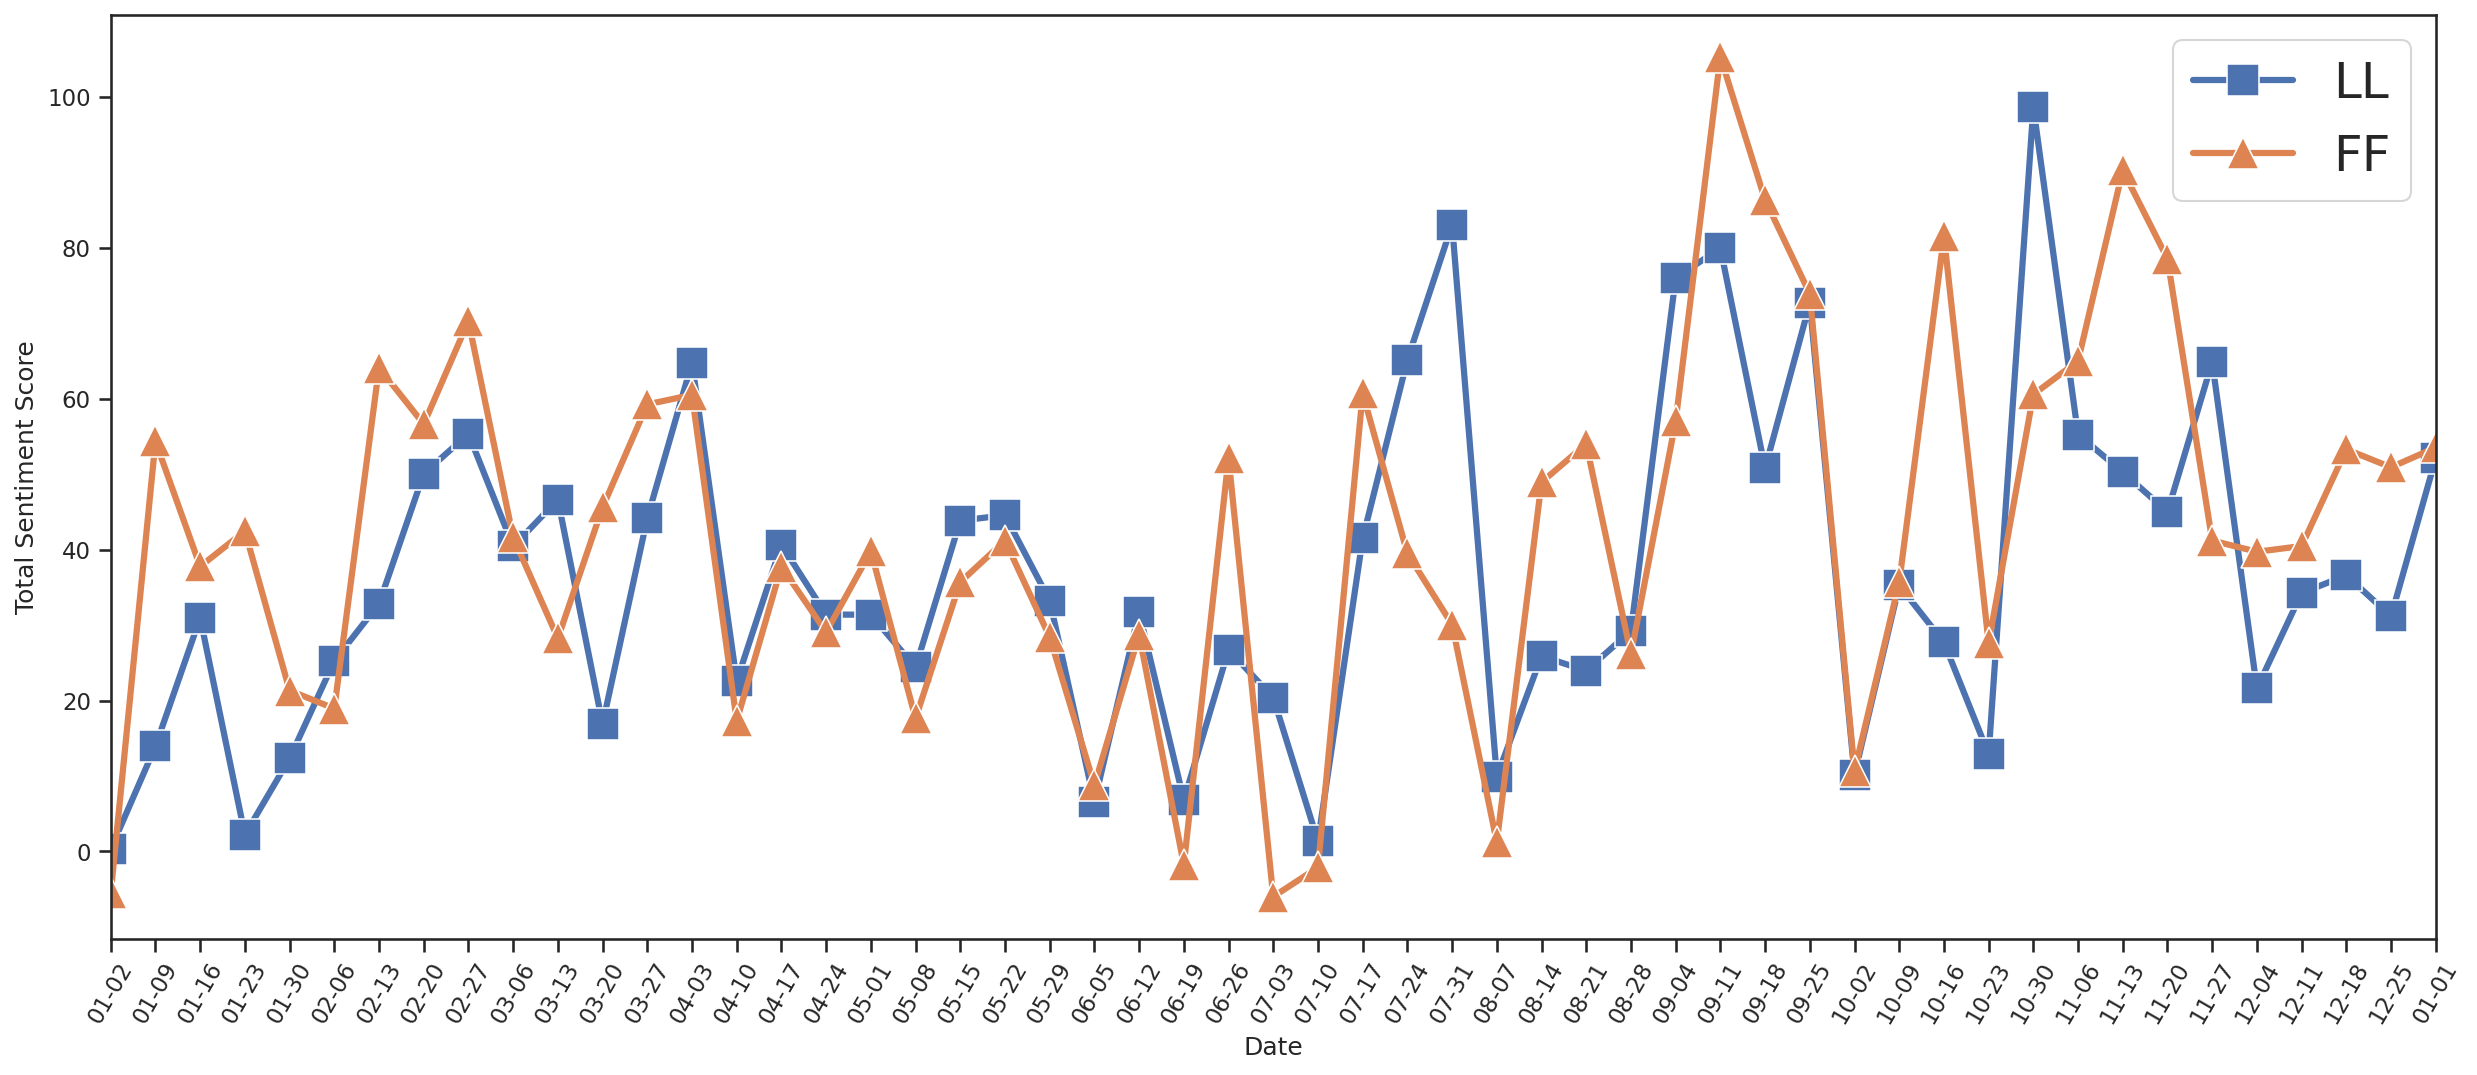

In [ ]:
ax = sns.lineplot(data=totSenScore0, linewidth=3, marker="s", markersize=15, label=labels[0])
ax = sns.lineplot(data=totSenScore1, linewidth=3, marker="^", markersize=15, ax=ax, label=labels[1])

ax.set_xlabel("Date")
plt.xticks(rotation=60)
ax.set_ylabel("Total Sentiment Score")
ax.set_xlim(0, 52)
ax.legend(prop={"size": 24})

ax.figure.set_size_inches(20, 8)
ax.figure.set_dpi(150)
plt.show()
plt.close()

### ÊØèÊó•Âπ≥ÂùáÊÉÖÊÑüÂàÜÊûê

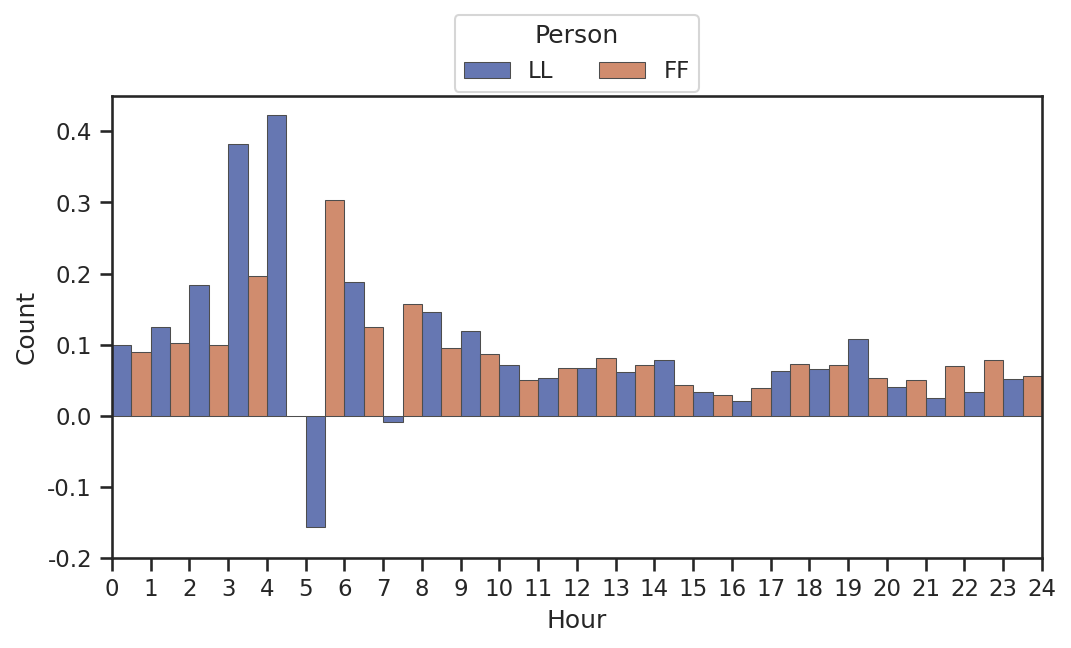

In [ ]:
grouper = pd.Grouper(key="hour")

data = []
for k in range(2):
    tmp = dfEs[k].groupby(grouper)["score"].mean().sort_index()
    for i in range(24):
        if i in tmp.index:
            data.append(tmp[i])
        else:
            data.append(0)
    data.append(0)
data = pd.DataFrame(
    {
        "Score": data,
        "Person": [labels[0]] * 25 + [labels[1]] * 25,
    }
)

xBins = [i for i in range(25)]
ax = sns.histplot(
    data=data,
    x=xBins * 2,
    bins=xBins,
    weights="Score",
    hue="Person",
    multiple=multiple,
    edgecolor=".3",
    linewidth=0.5,
    palette="dark",
    alpha=0.6,
)

ax.set_xticks(range(25))
ax.set_xticklabels(range(25))
ax.set_xlabel("Hour")
ax.set_xlim(0, 24)
ax.set_ylim(np.min([0, np.floor(data["Score"].min() / 0.05) * 0.05]), np.ceil(data["Score"].max() / 0.05) * 0.05)
sns.move_legend(ax, loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=2)

ax.figure.set_size_inches(8, 4)
ax.figure.set_dpi(150)
plt.show()
plt.close()

### ÊØèÊó•Á¥ØËÆ°ÊÉÖÊÑüÂàÜÊûê

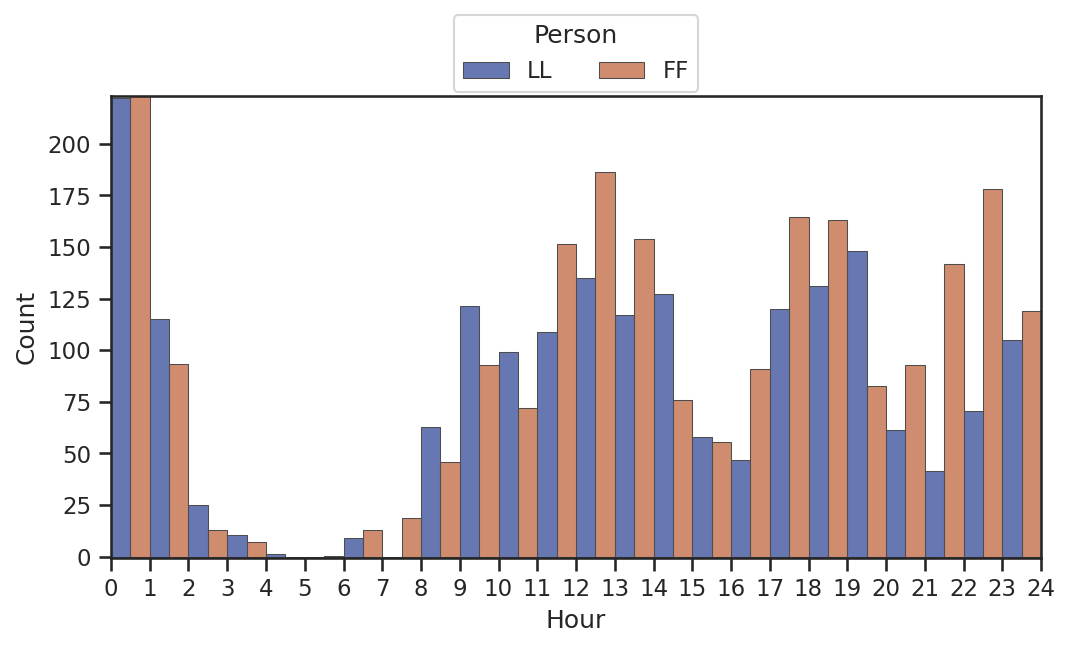

In [ ]:
grouper = pd.Grouper(key="hour")

data = []
for k in range(2):
    tmp = dfEs[k].groupby(grouper)["score"].sum().sort_index()
    for i in range(24):
        if i in tmp.index:
            data.append(tmp[i])
        else:
            data.append(0)
    data.append(0)
data = pd.DataFrame(
    {
        "Score": data,
        "Person": [labels[0]] * 25 + [labels[1]] * 25,
    }
)

xBins = [i for i in range(25)]
ax = sns.histplot(
    data=data,
    x=xBins * 2,
    bins=xBins,
    weights="Score",
    hue="Person",
    multiple=multiple,
    edgecolor=".3",
    linewidth=0.5,
    palette="dark",
    alpha=0.6,
)

ax.set_xticks(range(25))
ax.set_xticklabels(range(25))
ax.set_xlabel("Hour")
ax.set_xlim(0, 24)
ax.set_ylim(np.min([0, np.floor(data["Score"].min() / 0.05) * 0.05]), np.ceil(data["Score"].max() / 0.05) * 0.05)
sns.move_legend(ax, loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=2)

ax.figure.set_size_inches(8, 4)
ax.figure.set_dpi(150)
plt.show()
plt.close()